# Motivation Graphs

## PipeSwitch: Batch Size -- JCT Inflation

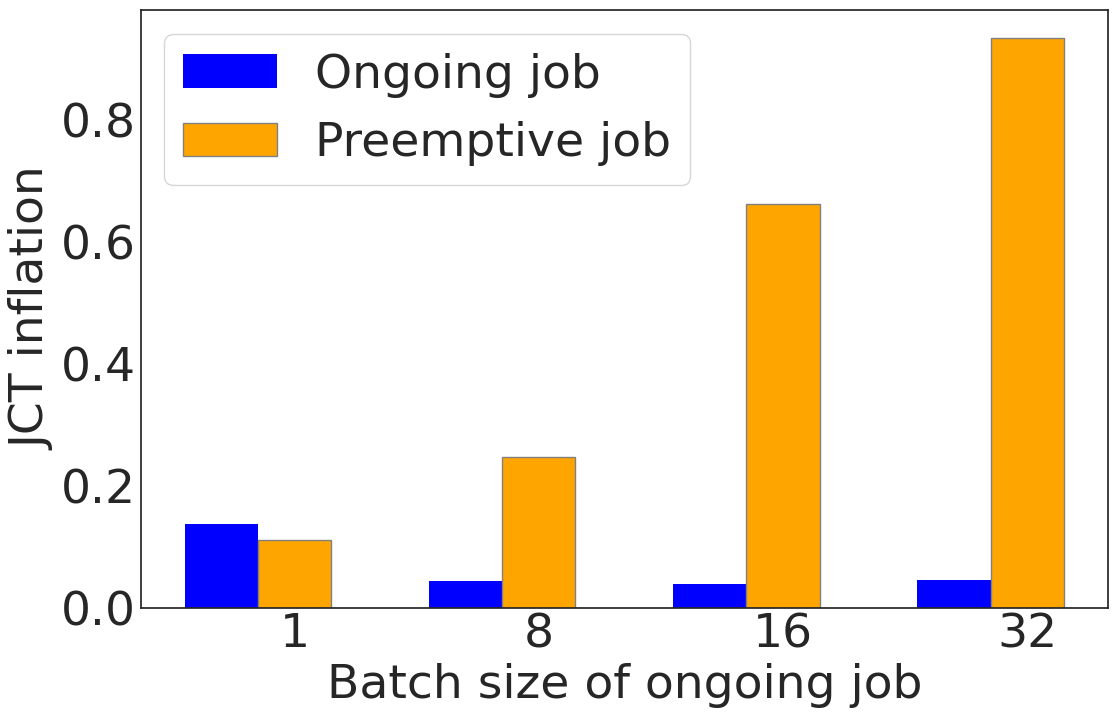

In [339]:

import os
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import numpy as np
from utils import read_json_file, parse_log
from plot_jct_2y import filter_log

%matplotlib inline
plt.rcParams['font.size'] = 34
fig, ax = plt.subplots(figsize=(12, 8))

avals, bvals = [], []
avals_abs, bvals_abs = [], []
model_A_batchs = [1, 8, 16, 32]

for model_A_batch in model_A_batchs:

    parent_folder = f"../../shepherd/fasterrcnn_resnet50_fpn_batch_{model_A_batch}_720p_vs_fasterrcnn_resnet50_fpn_batch_1_720p_kernel_sync/"
    model_A_profile = f"../profiles/fasterrcnn_resnet50_fpn_batch_{model_A_batch}_720p_sleep_0_kernel_sync/model_A.csv"
    model_B_profile = "../profiles/fasterrcnn_resnet50_fpn_batch_1_720p_sleep_1_kernel_sync/model_A.csv"

    model_A_log_fname = os.path.join(parent_folder, "model_A.csv")
    model_B_log_fname = os.path.join(parent_folder, "model_B.csv")

    model_A_log = parse_log(model_A_log_fname)
    model_B_log = parse_log(model_B_log_fname)
    exp_config = read_json_file(os.path.join(parent_folder, 'exp_config.json'))
    model_A_batch_size = exp_config['models'][0]['batch_size']

    model_A_log_filtered = filter_log(model_A_log, model_B_log)

    model_A_profile = parse_log(model_A_profile)
    avg_model_A_prof_jct = np.mean(model_A_profile['jct_ms'])
    model_B_profile = parse_log(model_B_profile)
    avg_model_B_prof_jct = np.mean(model_B_profile['jct_ms'])

    jcts = model_A_log['jct_ms']
    avals_abs.append(np.mean(jcts))
    # aerrs_abs.append(sem(jcts))
    avals.append((np.mean(jcts) - avg_model_A_prof_jct) / avg_model_A_prof_jct)
    # yerrs.append(sem((jcts - avg_model_A_prof_jct) / avg_model_A_prof_jct))

    jcts = model_B_log['jct_ms']
    bvals_abs.append(np.mean(jcts))
    # xerrs_abs.append(sem(jcts))
    bvals.append((np.mean(jcts) - avg_model_B_prof_jct) / avg_model_B_prof_jct)
    # xerrs.append(sem((jcts - avg_model_B_prof_jct) / avg_model_B_prof_jct))

barWidth = 0.3
br1 = np.arange(len(model_A_batchs))
br2 = [x + barWidth for x in br1]
 
ax.bar(br1, avals, color ='b', width = barWidth, label ='Ongoing job')
ax.bar(br2, bvals, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Preemptive job')
 
# Adding Xticks
ax.set_xlabel('Batch size of ongoing job')
ax.set_ylabel('JCT inflation')
ax.set_xticks([r + barWidth for r in range(len(model_A_batchs))],
        ['1', '8', '16', '32'])
plt.legend(frameon=True)
plt.tight_layout()
# plt.show()
plt.savefig("sync_vs_batch.pdf", bbox_inches='tight')


## PipeSwitch: Input Size -- JCT Inflation

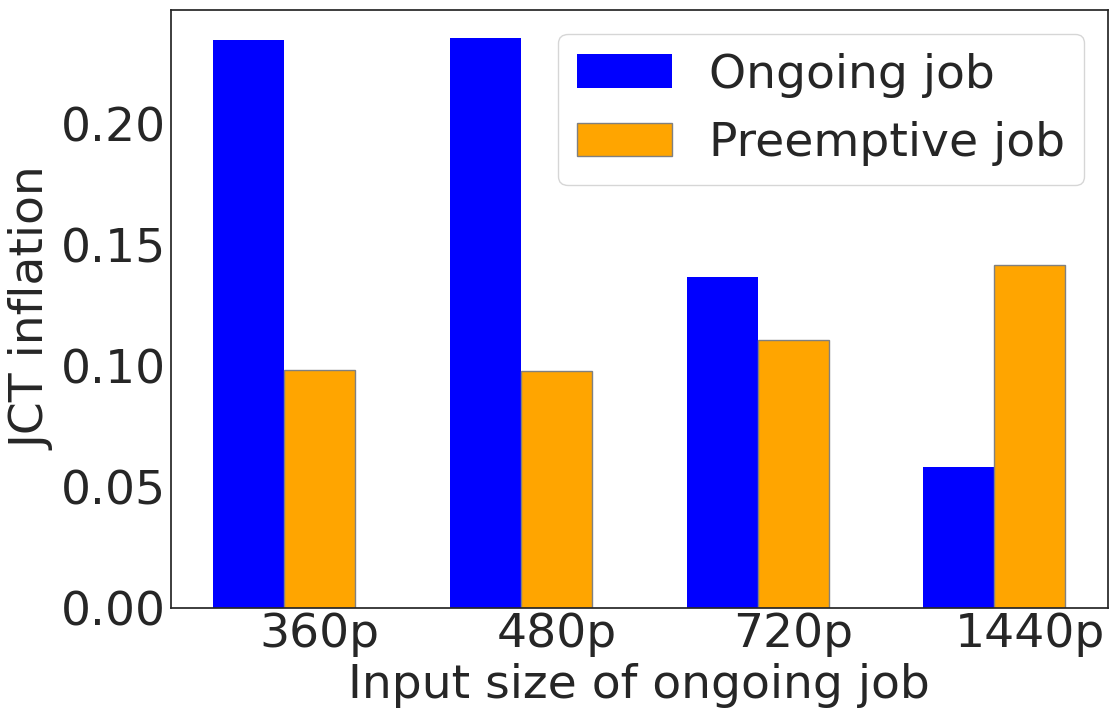

In [348]:

import os
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import numpy as np
from utils import read_json_file, parse_log
from plot_jct_2y import filter_log

%matplotlib inline
plt.rcParams['font.size'] = 34
fig, ax = plt.subplots(figsize=(12, 8))

avals, bvals = [], []
avals_abs, bvals_abs = [], []
model_A_input_sizes = [360, 480, 720, 1440]
# model_A_input_sizes = [180, 360, 720, 1440]

for model_A_input_size in model_A_input_sizes:

    parent_folder = f"../../shepherd/fasterrcnn_resnet50_fpn_batch_1_{model_A_input_size}p_vs_fasterrcnn_resnet50_fpn_batch_1_720p_kernel_sync/"
    model_A_profile = f"../profiles/fasterrcnn_resnet50_fpn_batch_1_{model_A_input_size}p_sleep_0_kernel_sync/model_A.csv"
    model_B_profile = "../profiles/fasterrcnn_resnet50_fpn_batch_1_720p_sleep_1_kernel_sync/model_A.csv"

    model_A_log_fname = os.path.join(parent_folder, "model_A.csv")
    model_B_log_fname = os.path.join(parent_folder, "model_B.csv")

    model_A_log = parse_log(model_A_log_fname)
    model_B_log = parse_log(model_B_log_fname)

    model_A_log_filtered = filter_log(model_A_log, model_B_log)

    model_A_profile = parse_log(model_A_profile)
    avg_model_A_prof_jct = np.mean(model_A_profile['jct_ms'])
    model_B_profile = parse_log(model_B_profile)
    avg_model_B_prof_jct = np.mean(model_B_profile['jct_ms'])

    jcts = model_A_log['jct_ms']
    avals_abs.append(np.mean(jcts))
    # aerrs_abs.append(sem(jcts))
    avals.append((np.mean(jcts) - avg_model_A_prof_jct) / avg_model_A_prof_jct)
    # yerrs.append(sem((jcts - avg_model_A_prof_jct) / avg_model_A_prof_jct))

    jcts = model_B_log['jct_ms']
    bvals_abs.append(np.mean(jcts))
    # xerrs_abs.append(sem(jcts))
    bvals.append((np.mean(jcts) - avg_model_B_prof_jct) / avg_model_B_prof_jct)
    # xerrs.append(sem((jcts - avg_model_B_prof_jct) / avg_model_B_prof_jct))

barWidth = 0.3
br1 = np.arange(len(model_A_input_sizes))
br2 = [x + barWidth for x in br1]
 
ax.bar(br1, avals, color ='b', width = barWidth, label ='Ongoing job')
ax.bar(br2, bvals, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Preemptive job')
 
# Adding Xticks
ax.set_xlabel('Input size of ongoing job')
ax.set_ylabel('JCT inflation')
ax.set_xticks([r + barWidth for r in range(len(model_A_input_sizes))],
        ['360p', '480p', '720p', '1440p'])
# ax.set_xticks([r + barWidth for r in range(len(model_A_input_sizes))],
#         ['180p', '360p', '720p', '1440p'])
plt.legend(frameon=True)
plt.tight_layout()
# plt.show()
plt.savefig("sync_vs_input_size.pdf", bbox_inches='tight')


1      328.384491
3      327.523644
4      329.120541
7      329.466076
8      329.538885
          ...    
221    331.069184
222    330.526913
224    330.864414
225    331.179162
228    331.853434
Name: jct_ms, Length: 146, dtype: float64


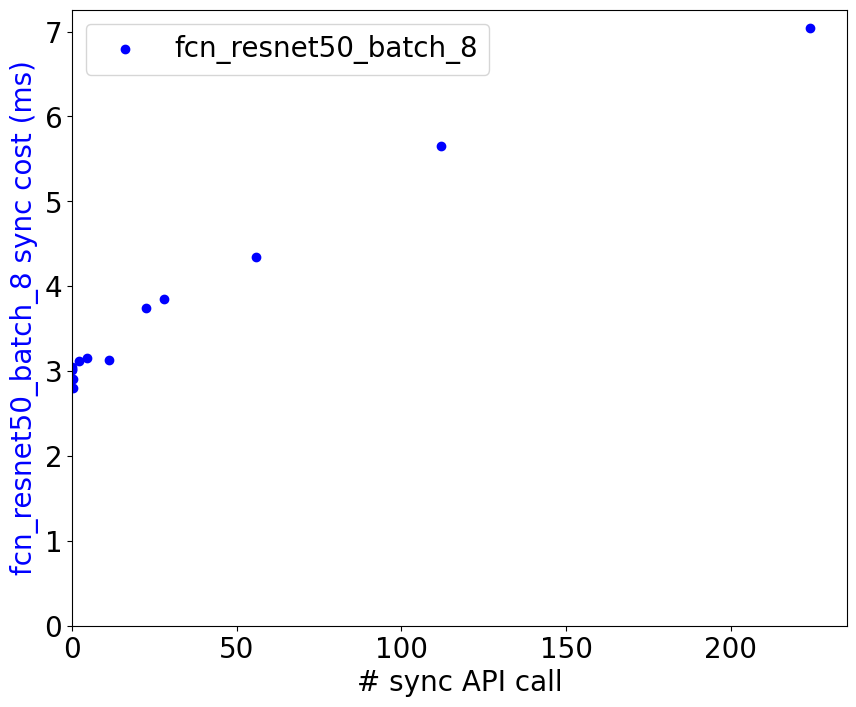

In [ ]:

import os
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import numpy as np
from utils import read_json_file, parse_log
# from plot_jct_2y import filter_log

def filter_log(model_A_log, model_B_log, sync):
    # filter out model_A jobs which are in collision with model_B jobs
    mask = np.ones(model_A_log.shape[0], dtype=bool)
    for _, row in model_B_log.iterrows():

        m1 = model_A_log['start_timestamp_ns'] / 1e6 >= row['end_timestamp_ns'] / 1e6
        m2 = model_A_log['end_timestamp_ns'] /1e6 <= row['start_timestamp_ns'] /1e6
        mask = mask & (m1 | m2)
        # if row['end_timestamp_ns'] == 1835126281848026:
    # if sync == 1000000:
    #     print(model_A_log[mask])
    return model_A_log[mask]

%matplotlib inline
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(12, 8))

avals, bvals = [], []
avals_abs, bvals_abs = [], []
syncs = [1, 2, 4, 8, 10, 20, 50, 100, 500, 1000, 5000, 10000, 1000000]

# model_A_name = "deeplabv3_mobilenet_v3_large_batch_16"
model_A_name = "fcn_resnet50_batch_8"
# model_A_name = "codegen_batch_16"
model_B_name = "fasterrcnn_resnet50_fpn_batch_1"

log_dir = f"../../results/{model_A_name}_vs_{model_B_name}/"
model_A_profile = f"../profiles/{model_A_name}_720p_sleep_0_kernel_sync/model_A.csv"
model_A_profile = parse_log(model_A_profile)
model_B_profile = f"../profiles/{model_B_name}_720p_sleep_1_kernel_sync/model_A.csv"
model_B_profile = parse_log(model_B_profile)

num_ker = 224
num_sync_calls = num_ker / np.array(syncs)

for sync in syncs:
    parent_folder = os.path.join(log_dir, f"sync_{sync}")

    model_A_log_fname = os.path.join(parent_folder, "model_A.csv")
    model_B_log_fname = os.path.join(parent_folder, "model_B.csv")
    model_A_log = parse_log(model_A_log_fname)
    model_B_log = parse_log(model_B_log_fname)
    exp_config = read_json_file(os.path.join(parent_folder, 'exp_config.json'))
    model_A_batch_size = exp_config['models'][0]['batch_size']

    model_A_log_filtered = filter_log(model_A_log, model_B_log, sync)

    avg_model_A_prof_jct = np.mean(model_A_profile['jct_ms'])
    avg_model_B_prof_jct = np.mean(model_B_profile['jct_ms'])

    jcts = model_A_log_filtered['jct_ms']
    avals_abs.append(np.mean(jcts))
    avals.append((np.mean(jcts) - avg_model_A_prof_jct))
    if sync == 1000000:
        print((jcts))

    # jcts = model_B_log['jct_ms']
    # bvals_abs.append(np.mean(jcts))
    # bvals.append((np.mean(jcts) - avg_model_B_prof_jct))

y1_color = 'b'
y2_color = 'r'
ax.set_xlabel('# sync API call')
# ax.set_xscale("log")
ax.scatter(num_sync_calls, avals, marker='o', color=y1_color, label=f'{model_A_name}')
# ax2 = ax.twinx()
# ax2.scatter(syncs, avals, marker='^', color=y2_color, label=f'{model_A_name}')
ax.set_xlim(0, )
ax.set_ylim(0, )
ax.set_ylabel(f"{model_A_name} sync cost (ms)", color=y1_color)
# ax2.set_ylabel(f"{model_A_name} delay inflation", color=y2_color)
# ax.set_title()
plt.legend()
plt.show()
# plt.savefig("sync_vs_batch.pdf")


# Design

## each CUDASync API call cost is predictable

retinanet_resnet50_fpn_batch_1_1440p bloom_batch_1_720p
retinanet_resnet50_fpn_batch_16_720p fasterrcnn_resnet50_fpn_batch_1_720p
deeplabv3_mobilenet_v3_large_batch_8_720p codegen_batch_1_720p
fasterrcnn_resnet50_fpn_batch_4_1440p codegen_batch_1_720p
fcn_resnet50_batch_8_720p fasterrcnn_resnet50_fpn_batch_1_720p
bloom_batch_16_720p fasterrcnn_resnet50_fpn_batch_1_720p
retinanet_resnet50_fpn_batch_16_720p bloom_batch_1_720p
deeplabv3_mobilenet_v3_large_batch_16_720p fasterrcnn_resnet50_fpn_batch_1_720p
fasterrcnn_resnet50_fpn_batch_8_1440p fasterrcnn_resnet50_fpn_batch_1_720p
bloom_batch_1_720p fasterrcnn_resnet50_fpn_batch_1_720p
fcn_resnet50_batch_4_720p codegen_batch_1_720p
codegen_batch_16_720p fasterrcnn_resnet50_fpn_batch_1_720p


/dataheart/yhao/env/envs/gpushare/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


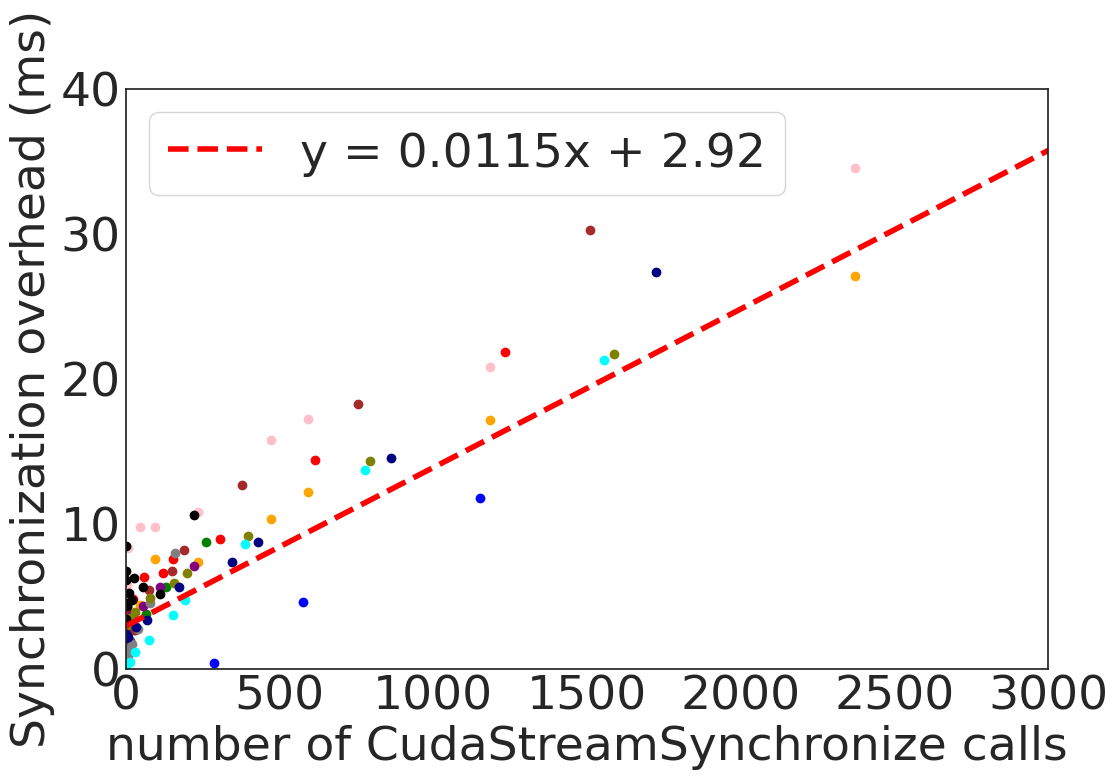

In [360]:

import os
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import numpy as np
from utils import read_json_file, parse_log
from plot_jct_2y import filter_log
from sklearn.linear_model import LinearRegression

COLORS = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray',
          'olive', 'cyan', 'black', 'navy', 'yellow']
NUM_KERNEL = {'deeplabv3_mobilenet_v3_large_batch_8_720p': 261, 
              'fasterrcnn_resnet50_fpn_batch_4_1440p': 1233,
              'fcn_resnet50_batch_8_720p': 224,
              'bloom_batch_16_720p': 1510,
              'deeplabv3_mobilenet_v3_large_batch_16_720p': 160,
              'fasterrcnn_resnet50_fpn_batch_8_1440p': 1589,
              'bloom_batch_1_720p': 1556,
              'fcn_resnet50_batch_4_720p': 222,
              'codegen_batch_16_720p': 3453,
              'retinanet_resnet50_fpn_batch_16_720p': 4745,
              'ssd300_vgg16_batch_16_720p': 34869,
              'retinanet_resnet50_fpn_batch_1_1440p': 1154,
              'maskrcnn_resnet50_fpn_v2_batch_1_1440p': 2444}
LABELS = {'deeplabv3_mobilenet_v3_large_batch_8_720p': 'DeepLabV3_MobileNet_batch_8_720p', 
              'fasterrcnn_resnet50_fpn_batch_4_1440p': 'FasterRCNN_ResBet50_batch_4_1440p',
              'fcn_resnet50_batch_8_720p': 'FCN_ResNet50_batch_8_720p',
              'bloom_batch_16_720p': 'Bloom_batch_16',
              'deeplabv3_mobilenet_v3_large_batch_16_720p': 'DeepLabV3_MobileNet_batch_16_720p',
              'fasterrcnn_resnet50_fpn_batch_8_1440p': 'FasterRCNN_ResBet50_batch_8_1440p',
              'bloom_batch_1_720p': 'Bloom_batch_1',
              'fcn_resnet50_batch_4_720p': 'FCN_ResNet50_batch_4_720p',
              'codegen_batch_16_720p': 'CodeGen_batch_16',
              'retinanet_resnet50_fpn_batch_16_720p': 'RetinaNet_ResNet50_batch_16_720p',
              'ssd300_vgg16_batch_16_720p': 'SSD300_vgg16_batch_16_720p',
              'retinanet_resnet50_fpn_batch_1_1440p': 'RetinaNet_ResNet50_batch_1_1440p',
              'maskrcnn_resnet50_fpn_v2_batch_1_1440p': 'MaskRCNN_ResNet50_batch_1_1440p'}

%matplotlib inline
plt.rcParams['font.size'] = 34
fig, ax = plt.subplots(figsize=(12, 8))

syncs = [1, 2, 4, 8, 10, 20, 50, 100, 500, 1000, 5000, 10000, 1000000]

x, y = [], []

for i, log_dir in enumerate(os.listdir("../../results/")):
    model_A_name, model_B_name = log_dir.split('_vs_')
    print(model_A_name, model_B_name)

    # log_dir = f"../../results/{model_A_name}_vs_{model_B_name}/"
    model_A_profile = f"../profiles/{model_A_name}_sleep_0_kernel_sync/model_A.csv"
    model_A_profile = parse_log(model_A_profile)
    model_B_profile = f"../profiles/{model_B_name}_sleep_1_kernel_sync/model_A.csv"
    model_B_profile = parse_log(model_B_profile)

    num_sync_calls = NUM_KERNEL[model_A_name] / np.array(syncs)

    avals, bvals = [], []
    avals_abs, bvals_abs = [], []

    for sync in syncs:
        parent_folder = os.path.join(f"../../results/{log_dir}", f"sync_{sync}")

        model_A_log_fname = os.path.join(parent_folder, "model_A.csv")
        model_B_log_fname = os.path.join(parent_folder, "model_B.csv")
        model_A_log = parse_log(model_A_log_fname)
        model_B_log = parse_log(model_B_log_fname)

        model_A_log_filtered = filter_log(model_A_log, model_B_log)

        avg_model_A_prof_jct = np.mean(model_A_profile['jct_ms'])
        avg_model_B_prof_jct = np.mean(model_B_profile['jct_ms'])

        jcts = model_A_log_filtered['jct_ms']
        avals_abs.append(np.mean(jcts))
        avals.append((np.mean(jcts) - avg_model_A_prof_jct))
        # if sync == 1000000:
        #     print(len(jcts))

        jcts = model_B_log['jct_ms']
        bvals_abs.append(np.mean(jcts))
        bvals.append((np.mean(jcts) - avg_model_B_prof_jct))
    
    # ax.set_xscale("log")
    ax.scatter(num_sync_calls, avals, marker='o', color=COLORS[i])
    x.extend(num_sync_calls)
    y.extend(avals)

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
y[np.isnan(y)] = 0
line = LinearRegression().fit(x, y)
fit_x = [0, np.amax(x)]
fit_y = [line.intercept_, np.amax(x) * line.coef_[0, 0]]
intercept = "{0:.3g}".format(line.intercept_[0])
slope = "{0:.3g}".format(line.coef_[0, 0])
ax.plot(fit_x, fit_y, color='r', linewidth=4, linestyle='dashed', label=f'y = {slope}x + {intercept}')
ax.set_xlabel('number of CudaStreamSynchronize calls')
ax.set_xlim(0, 3000)
ax.set_ylim(0, 40)
ax.set_ylabel("Synchronization overhead (ms)")
# ax2.set_ylabel(f"{model_A_name} delay inflation", color=y2_color)
# ax.set_title()
plt.legend(frameon=True)
plt.tight_layout()
# plt.show()
plt.savefig("overhead_vs_num_sync.pdf", bbox_inches='tight')


In [ ]:
print(line.coef_, line.intercept_)

[[0.01132149]] [3.71470731]


# Final Evaluation Graph

best sync = 20
pipeswitch  | job0 | 7 out of 351 missed ddl, ddl = 735.930586923077
pipeswitch  | job1 | 56 out of 109 missed ddl, ddl = 85.77049423531963
reef  | job0 | 1 out of 547 missed ddl, ddl = 735.930586923077
reef  | job1 | 1 out of 125 missed ddl, ddl = 85.77049423531963
shepherd  | job0 | 1 out of 358 missed ddl, ddl = 735.1537392
shepherd  | job1 | 9 out of 24 missed ddl, ddl = 85.77049423531963
deft  | job0 | 0 out of 563 missed ddl, ddl = 735.930586923077
deft  | job1 | 6 out of 121 missed ddl, ddl = 85.77049423531963
0.019943019943019943
0.0018281535648994515
0.002793296089385475
0.0


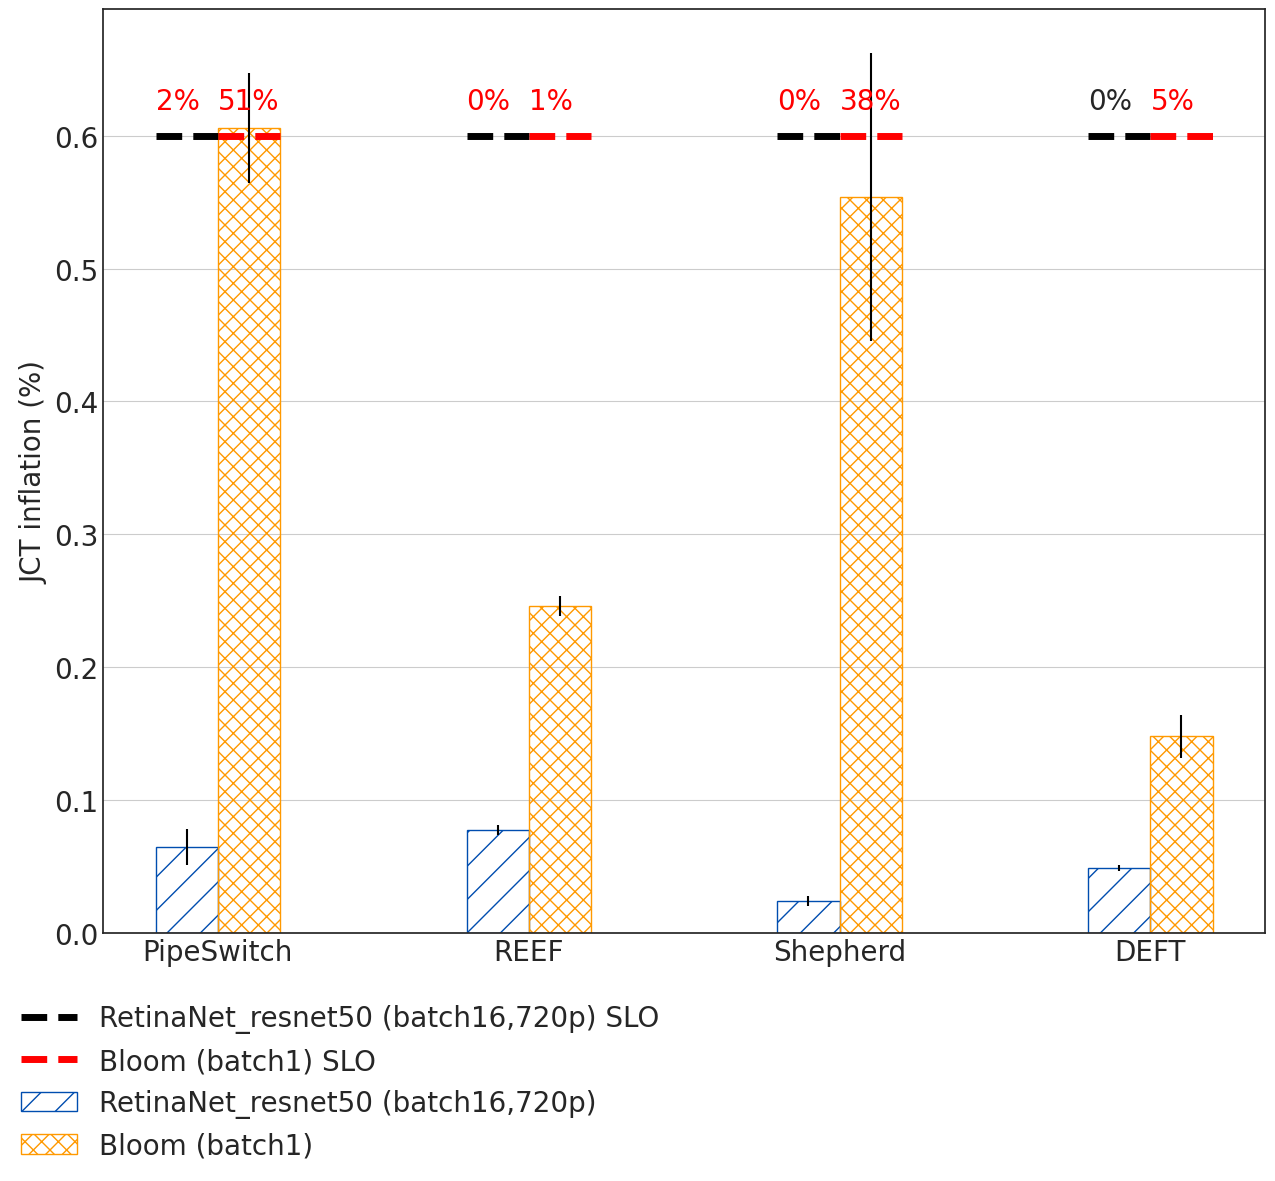

In [319]:
import os
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import numpy as np
from utils import read_json_file, parse_log, sem
%matplotlib inline


plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 20
colors = [
    '#004DAF',
    '#FF9900',
    '#ED1B3A',
    '#33A02C',
    '#FABEAF',
    '#AAD59B'
]
fig, ax = plt.subplots(figsize=(15, 12))
handles, labels = ax.get_legend_handles_labels()

settings = ["PipeSwitch", "REEF", "Shepherd", "DEFT"]
jobA_name = "RetinaNet_resnet50 (batch16,720p)"
jobB_name = "Bloom (batch1)"
data = []

# def get_collisions(model_A_log, model_B_log):
#     mask_A = np.ones(model_A_log.shape[0], dtype=bool)
#     for _, row in model_B_log.iterrows():
#         m1 = model_A_log['start_timestamp_ns'] / 1e6 >= row['end_timestamp_ns'] / 1e6
#         m2 = model_A_log['end_timestamp_ns'] /1e6 <= row['start_timestamp_ns'] /1e6
#         mask_A = mask_A & (m1 | m2)
    
#     mask_B = np.ones(model_B_log.shape[0], dtype=bool)
#     for _, row in model_A_log.iterrows():
#         m1 = model_B_log['start_timestamp_ns'] / 1e6 >= row['start_timestamp_ns'] / 1e6
#         m2 = model_B_log['end_timestamp_ns'] /1e6 <= row['end_timestamp_ns'] /1e6
#         mask_B = mask_B & (m1 & m2)
#     print(mask_B)
#     return model_A_log[~mask_A], model_B_log

def get_best_sync(n, k):
    overheads = []
    syncs = [1000000, 1, 2, 4, 8, 10, 20, 50, 100, 500, 1000, 5000, 10000]
    for sync in syncs:
        preemption_overhead = sync * k
        sync_overhead = 3.71 + (n / sync) * 0.01132149
        overheads.append(preemption_overhead + sync_overhead)
    best_sync = syncs[np.array(overheads).argmin()]
    return best_sync

def parse_result(method, log_dir, sync):
    model_A_name, model_B_name = log_dir.split('_vs_')
    if "layer_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_layer")]
    elif "kernel_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_kernel")]
    # print(model_A_name, model_B_name)

    model_A_profile = f"../profiles/{model_A_name}_sleep_0_kernel_sync/model_A.csv"
    model_A_profile = parse_log(model_A_profile)
    model_B_profile = f"../profiles/{model_B_name}_sleep_1_kernel_sync/model_A.csv"
    model_B_profile = parse_log(model_B_profile)
    avg_model_A_prof_jct = np.mean(model_A_profile['jct_ms'])
    avg_model_B_prof_jct = np.mean(model_B_profile['jct_ms'])

    if method == "deft":
        parent_folder = os.path.join(f"../../temp_res/{log_dir}", f"sync_{sync}")
        if not os.path.exists(parent_folder):
            parent_folder = os.path.join(f"../../results/{log_dir}", f"sync_{sync}")
    else:
        parent_folder = f"../../{method}/{log_dir}"
    # print(parent_folder)

    model_A_log_fname = os.path.join(parent_folder, "model_A.csv")
    model_B_log_fname = os.path.join(parent_folder, "model_B.csv")
    model_A_log = parse_log(model_A_log_fname)
    model_B_log = parse_log(model_B_log_fname)
    # model_A_log, model_B_log = get_collisions(model_A_log, model_B_log)

    a_jcts = model_A_log['jct_ms']
    if avg_model_A_prof_jct > a_jcts.min():
        avg_model_A_prof_jct = a_jcts.min()
    avals_abs = (np.mean(a_jcts))
    aerrs_abs = (sem(a_jcts))
    a_inflations = ((np.mean(a_jcts) - avg_model_A_prof_jct) / avg_model_A_prof_jct)
    a_inflation_errs = sem(((a_jcts) - avg_model_A_prof_jct) / avg_model_A_prof_jct)

    b_jcts = model_B_log['jct_ms']
    bvals_abs = (np.mean(b_jcts))
    berrs_abs = (sem(b_jcts))
    b_inflations = ((np.mean(b_jcts) - avg_model_B_prof_jct) / avg_model_B_prof_jct)
    b_inflation_errs = sem(((b_jcts) - avg_model_B_prof_jct) / avg_model_B_prof_jct)

    a_ddl = avg_model_A_prof_jct * 1.6
    b_ddl = avg_model_B_prof_jct * 1.6
    a_miss_rate = np.sum(a_jcts > a_ddl) / np.size(a_jcts)
    b_miss_rate = np.sum(b_jcts > b_ddl) / np.size(b_jcts)

    print(method, f" | job0 | {np.sum(a_jcts > a_ddl)} out of {np.size(a_jcts)} missed ddl, ddl = {a_ddl}")
    print(method, f" | job1 | {np.sum(b_jcts > b_ddl)} out of {np.size(b_jcts)} missed ddl, ddl = {b_ddl}")

    # if method == "reef":
    #     from plot_jct_2y import plot_job_arrival
    #     plot_job_arrival(model_A_log, model_B_log, model_A_name, model_B_name, log_dir)

    return [a_inflations, b_inflations, a_inflation_errs, b_inflation_errs, a_miss_rate, b_miss_rate, a_ddl, b_ddl]

best_sync = get_best_sync(4745, 0.09)
print(f"best sync = {best_sync}")
data.append(parse_result("pipeswitch", "retinanet_resnet50_fpn_batch_16_720p_vs_bloom_batch_1_720p_layer_sync", 20))
data.append(parse_result("reef", "retinanet_resnet50_fpn_batch_16_720p_vs_bloom_batch_1_720p", 4))
data.append(parse_result("shepherd", "retinanet_resnet50_fpn_batch_16_720p_vs_bloom_batch_1_720p_kernel_sync", 20))
data.append(parse_result("deft", "retinanet_resnet50_fpn_batch_16_720p_vs_bloom_batch_1_720p", best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
# job0_ddl = data[0, 6]
# job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0):
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
    l2 = ax.hlines(job1_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="red", label=f"{jobB_name} SLO")
handles.extend([l1, l2, job0_bars, job1_bars])
ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.05))
# ax.legend(bbox_to_anchor=(0.5, -0.05))
ax.yaxis.grid(True)
# ax.set_ylim(0, 350)
ax.set_ylabel("JCT inflation (%)")
plt.xticks(x, settings)
plt.show()
# plt.savefig("result.pdf")

In [162]:
print(job1_jct)
print(job1_ddl)

[0.24589136 0.60568308 0.5538079  0.14810458]
0.6


best sync = 20
best sync = 20
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
pipeswitch  | job0 | 0 out of 674 missed ddl, ddl = 388.9002272
pipeswitch  | job1 | 2 out of 14 missed ddl, ddl = 85.77049423531963
reef  | job0 | 2 out of 646 missed ddl, ddl = 388.9002272
reef  | job1 | 1 out of 29 missed ddl, ddl = 85.77049423531963
shepherd  | job0 | 1 out of 701 missed ddl, ddl = 388.9002272
shepherd  | job1 | 2 out of 32 missed ddl, ddl = 85.77049423531963
deft  | job0 | 1 out of 690 missed ddl, ddl = 388.9002272
deft  | job1 | 0 out of 23 missed ddl, ddl = 85.77049423531963
0.0
0.0030959752321981426
0.0014265335235378032
0.0014492753623188406


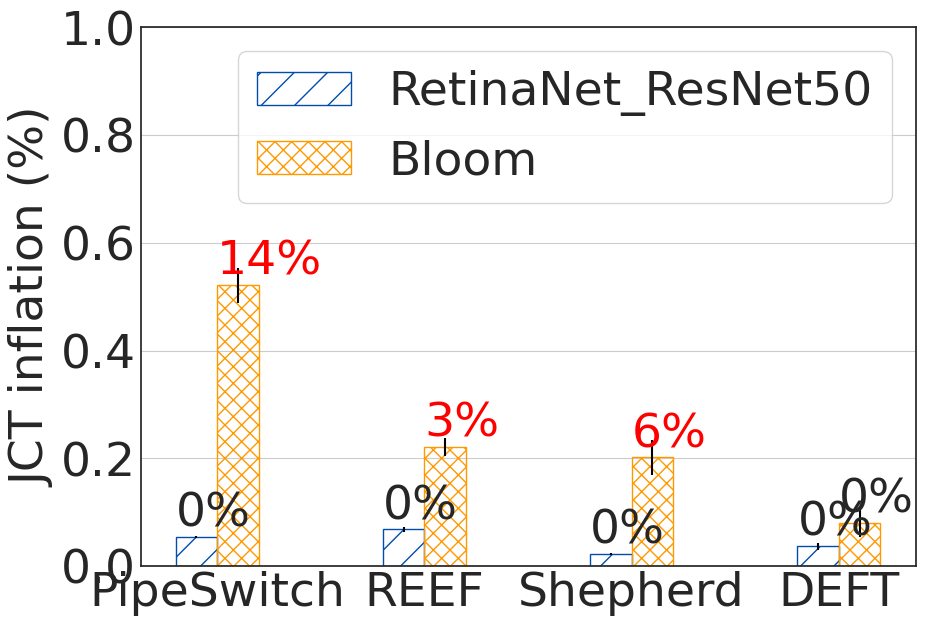

In [334]:
fig, ax = plt.subplots(figsize=(10, 7))
handles, labels = ax.get_legend_handles_labels()
matplotlib.rcParams.update({'font.size': 34})

jobA_name = "RetinaNet"
jobB_name = "Bloom"
data = []
dir = "retinanet_resnet50_fpn_batch_8_720p_vs_bloom_batch_1_720p"

best_sync = get_best_sync(2820, 0.08)
print(f"best sync = {best_sync}")
a_jct_min = 10000000
b_jct_min = 10000000

def find_min_jct(method, log_dir, sync):
    print(x)
    model_A_name, model_B_name = log_dir.split('_vs_')
    if "layer_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_layer")]
    elif "kernel_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_kernel")]
    # print(model_A_name, model_B_name)

    model_A_profile = f"../profiles/{model_A_name}_sleep_0_kernel_sync/model_A.csv"
    model_A_profile = parse_log(model_A_profile)
    model_B_profile = f"../profiles/{model_B_name}_sleep_1_kernel_sync/model_A.csv"
    model_B_profile = parse_log(model_B_profile)
    avg_model_A_prof_jct = np.mean(model_A_profile['jct_ms'])
    avg_model_B_prof_jct = np.mean(model_B_profile['jct_ms'])

    if method == "deft":
        parent_folder = os.path.join(f"../../temp_res/{log_dir}", f"sync_{sync}")
        if not os.path.exists(parent_folder):
            parent_folder = os.path.join(f"../../results/{log_dir}", f"sync_{sync}")
    else:
        parent_folder = f"../../{method}/{log_dir}"
    # print(parent_folder)

    model_A_log_fname = os.path.join(parent_folder, "model_A.csv")
    model_B_log_fname = os.path.join(parent_folder, "model_B.csv")
    model_A_log = parse_log(model_A_log_fname)
    model_B_log = parse_log(model_B_log_fname)
    # model_A_log, model_B_log = get_collisions(model_A_log, model_B_log)

    global a_jct_min
    a_jcts = model_A_log['jct_ms']
    a_jct_min = min(a_jcts.min(), a_jct_min)

    global b_jct_min
    b_jcts = model_B_log['jct_ms']
    b_jct_min = min(b_jcts.min(), b_jct_min)


def parse_result(method, log_dir, sync):
    model_A_name, model_B_name = log_dir.split('_vs_')
    if "layer_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_layer")]
    elif "kernel_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_kernel")]
    # print(model_A_name, model_B_name)

    model_A_profile = f"../profiles/{model_A_name}_sleep_0_kernel_sync/model_A.csv"
    model_A_profile = parse_log(model_A_profile)
    model_B_profile = f"../profiles/{model_B_name}_sleep_1_kernel_sync/model_A.csv"
    model_B_profile = parse_log(model_B_profile)
    avg_model_A_prof_jct = np.mean(model_A_profile['jct_ms'])
    avg_model_B_prof_jct = np.mean(model_B_profile['jct_ms'])

    if method == "deft":
        parent_folder = os.path.join(f"../../temp_res/{log_dir}", f"sync_{sync}")
        if not os.path.exists(parent_folder):
            parent_folder = os.path.join(f"../../results/{log_dir}", f"sync_{sync}")
    else:
        parent_folder = f"../../{method}/{log_dir}"
    # print(parent_folder)

    model_A_log_fname = os.path.join(parent_folder, "model_A.csv")
    model_B_log_fname = os.path.join(parent_folder, "model_B.csv")
    model_A_log = parse_log(model_A_log_fname)
    model_B_log = parse_log(model_B_log_fname)
    # model_A_log, model_B_log = get_collisions(model_A_log, model_B_log)

    a_jcts = model_A_log['jct_ms']
    # avg_model_A_prof_jct = 73.75
    avals_abs = (np.mean(a_jcts))
    aerrs_abs = (sem(a_jcts))
    avg_model_A_prof_jct = min(avg_model_A_prof_jct, a_jct_min)
    a_inflations = ((np.mean(a_jcts) - avg_model_A_prof_jct) / avg_model_A_prof_jct)
    a_inflation_errs = sem(((a_jcts) - avg_model_A_prof_jct) / avg_model_A_prof_jct)

    b_jcts = model_B_log['jct_ms']
    bvals_abs = (np.mean(b_jcts))
    berrs_abs = (sem(b_jcts))
    avg_model_B_prof_jct = min(avg_model_B_prof_jct, b_jct_min)
    b_inflations = ((np.mean(b_jcts) - avg_model_B_prof_jct) / avg_model_B_prof_jct)
    b_inflation_errs = sem(((b_jcts) - avg_model_B_prof_jct) / avg_model_B_prof_jct)

    a_ddl = avg_model_A_prof_jct * 1.6
    b_ddl = avg_model_B_prof_jct * 1.6
    a_miss_rate = np.sum(a_jcts > a_ddl) / np.size(a_jcts)
    b_miss_rate = np.sum(b_jcts > b_ddl) / np.size(b_jcts)

    print(method, f" | job0 | {np.sum(a_jcts > a_ddl)} out of {np.size(a_jcts)} missed ddl, ddl = {a_ddl}")
    print(method, f" | job1 | {np.sum(b_jcts > b_ddl)} out of {np.size(b_jcts)} missed ddl, ddl = {b_ddl}")

    return [a_inflations, b_inflations, a_inflation_errs, b_inflation_errs, a_miss_rate, b_miss_rate, a_ddl, b_ddl]


print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("reef", dir, 4))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0.004):
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), bar.get_height()+ text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    # l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
ax.legend(frameon=True)
ax.yaxis.grid(True)
ax.set_ylim(0, 1)
ax.set_ylabel("JCT inflation (%)")

plt.xticks(x, settings)
# plt.tight_layout()
# plt.show()
plt.savefig("eval1_batch8_720p_inflation.pdf", bbox_inches='tight')

In [164]:
print(job0_rate, job1_rate)

[0.00309598 0.         0.00142653 0.00144928] [0.03448276 0.14285714 0.0625     0.        ]


best sync = 20
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
pipeswitch  | job0 | 20 out of 3780 missed ddl, ddl = 53.74955619250219
pipeswitch  | job1 | 0 out of 14 missed ddl, ddl = 85.1347616
reef  | job0 | 43 out of 3918 missed ddl, ddl = 53.74955619250219
reef  | job1 | 1 out of 42 missed ddl, ddl = 85.1347616
shepherd  | job0 | 40 out of 4644 missed ddl, ddl = 53.74955619250219
shepherd  | job1 | 1 out of 39 missed ddl, ddl = 85.1347616
deft  | job0 | 41 out of 4596 missed ddl, ddl = 53.74955619250219
deft  | job1 | 0 out of 40 missed ddl, ddl = 85.1347616
0.005291005291005291
0.010974987238386932
0.008613264427217916
0.008920800696257615


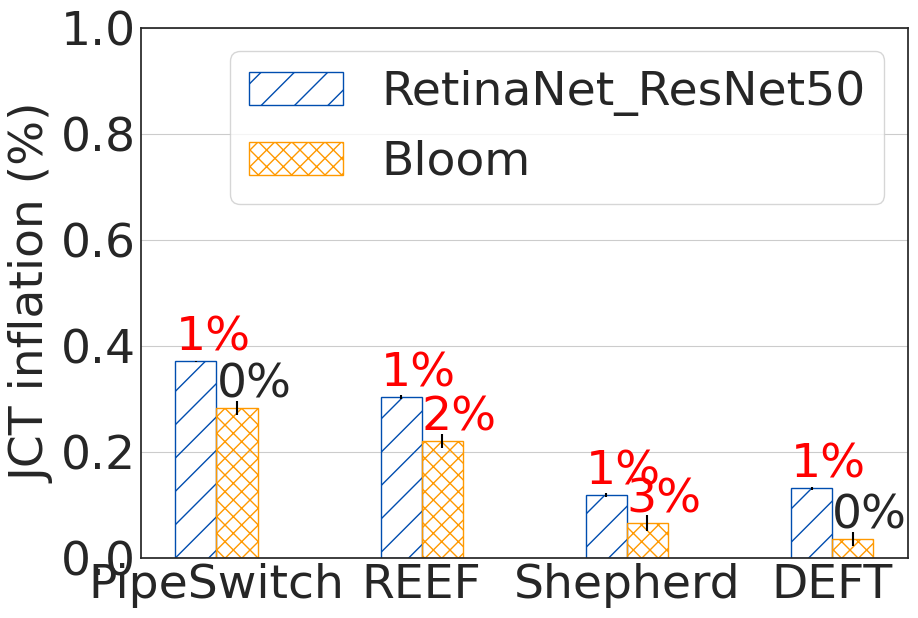

In [329]:
fig, ax = plt.subplots(figsize=(10, 7))
handles, labels = ax.get_legend_handles_labels()
matplotlib.rcParams.update({'font.size': 34})

jobA_name = "RetinaNet_ResNet50"
data = []
a_jct_min = 10000000
b_jct_min = 10000000

best_sync = get_best_sync(1178, 0.03)
print(f"best sync = {best_sync}")
dir  = "retinanet_resnet50_fpn_batch_1_720p_vs_bloom_batch_1_720p"

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("reef", dir, 4))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0.002):
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), bar.get_height()+ text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    # l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
ax.legend(frameon=True)
ax.yaxis.grid(True)
ax.set_ylim(0, 1)
ax.set_ylabel("JCT inflation (%)")

plt.xticks(x, settings)
plt.tight_layout()
# plt.show()
plt.savefig("eval1_batch1_720p_inflation.pdf", bbox_inches='tight')

In [167]:
print(job1_jct)
print(job0_rate)

[0.2115925  0.27330181 0.05876836 0.02895242]
[0.01097499 0.00529101 0.00861326 0.0089208 ]


best sync = 10
reef  | job0 | 4 out of 1428 missed ddl, ddl = 182.814584
reef  | job1 | 1 out of 36 missed ddl, ddl = 85.77049423531963
pipeswitch  | job0 | 0 out of 1462 missed ddl, ddl = 184.87163342693879
pipeswitch  | job1 | 2 out of 18 missed ddl, ddl = 85.77049423531963
shepherd  | job0 | 3 out of 1537 missed ddl, ddl = 174.69714720000002
shepherd  | job1 | 1 out of 29 missed ddl, ddl = 85.77049423531963
deft  | job0 | 2 out of 1545 missed ddl, ddl = 176.5069024
deft  | job1 | 1 out of 35 missed ddl, ddl = 85.77049423531963
0.0028011204481792717
0.0
0.001951854261548471
0.0012944983818770227


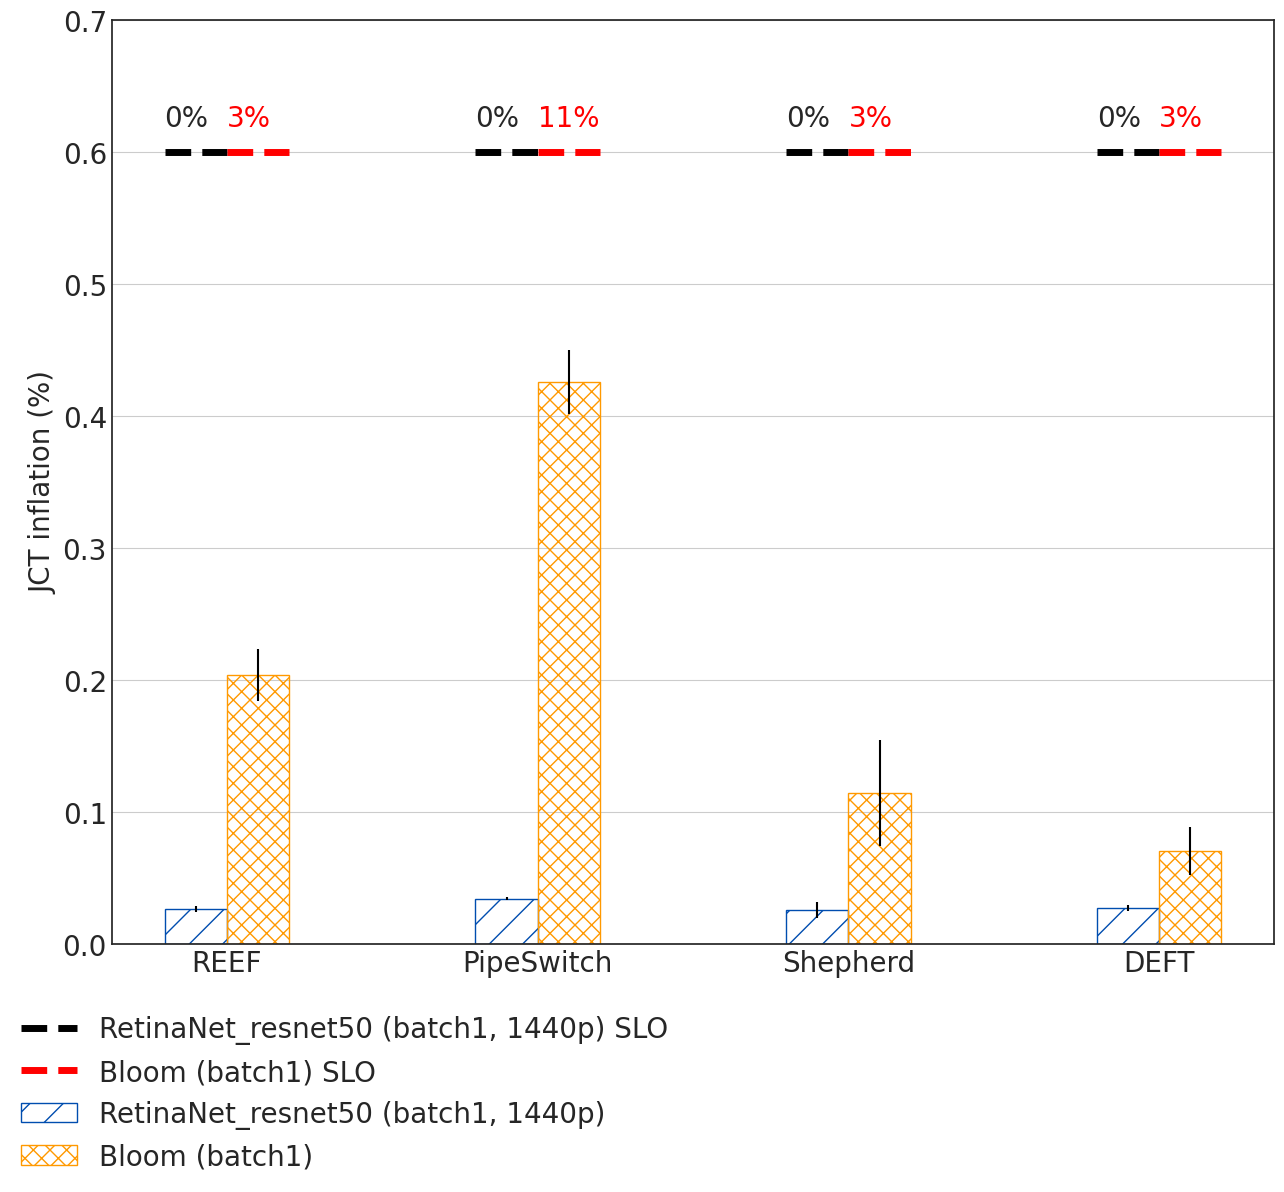

In [168]:
fig, ax = plt.subplots(figsize=(15, 12))
handles, labels = ax.get_legend_handles_labels()

jobA_name = "RetinaNet_ResNet50"
jobB_name = "Bloom"
data = []

best_sync = get_best_sync(1175, 0.0897)
print(f"best sync = {best_sync}")
data.append(parse_result("reef", "retinanet_resnet50_fpn_batch_1_1440p_vs_bloom_batch_1_720p", 4))
data.append(parse_result("pipeswitch", "retinanet_resnet50_fpn_batch_1_1440p_vs_bloom_batch_1_720p_layer_sync", 20))
data.append(parse_result("shepherd", "retinanet_resnet50_fpn_batch_1_1440p_vs_bloom_batch_1_720p_kernel_sync", 20))
data.append(parse_result("deft", "retinanet_resnet50_fpn_batch_1_1440p_vs_bloom_batch_1_720p", best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0.01):
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
    l2 = ax.hlines(job1_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="red", label=f"{jobB_name} SLO")
handles.extend([l1, l2, job0_bars, job1_bars])
ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.05))
# ax.legend(bbox_to_anchor=(0.5, -0.05))
ax.yaxis.grid(True)
ax.set_ylim(0, 0.7)
ax.set_ylabel("JCT inflation (%)")
plt.xticks(x, settings)
plt.show()

In [122]:
print(job0_rate)

[0.00280112 0.         0.00195185 0.00194553]


best sync = 20
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 2 out of 1076 missed ddl, ddl = 230.06821920000004
reef  | job1 | 1 out of 32 missed ddl, ddl = 85.2651408
pipeswitch  | job0 | 0 out of 1115 missed ddl, ddl = 230.06821920000004
pipeswitch  | job1 | 1 out of 1 missed ddl, ddl = 85.2651408
shepherd  | job0 | 2 out of 1168 missed ddl, ddl = 230.06821920000004
shepherd  | job1 | 7 out of 29 missed ddl, ddl = 85.2651408
deft  | job0 | 1 out of 1162 missed ddl, ddl = 230.06821920000004
deft  | job1 | 0 out of 35 missed ddl, ddl = 85.2651408
best sync = 50
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 42 out of 2109 missed ddl, ddl = 118.07138880000001
reef  | job1 | 1 out of 41 missed ddl, ddl = 85.29927520000001
pipeswitch  | job0 | 20 out of 2086 missed ddl, ddl = 118.07138880000001
pipeswitch  | job1 | 0 out of 19 missed ddl, ddl = 85.29927520000001
shepherd  | job0 | 41 out of 2262 missed ddl, ddl = 118.07138880000001
shepherd  | job1 | 1 out of 40 missed dd

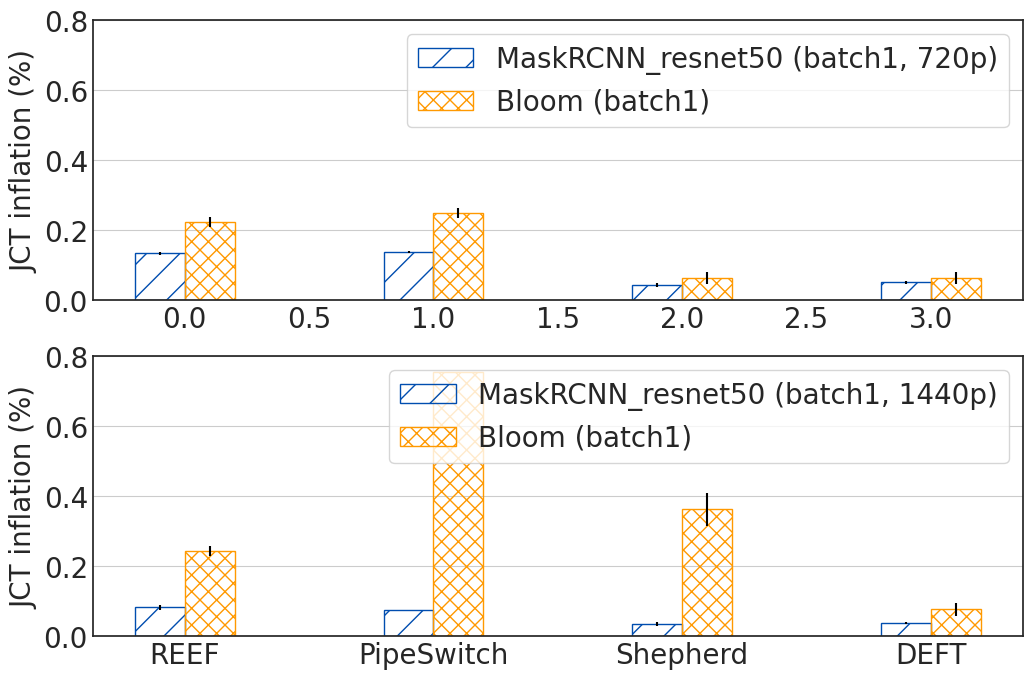

In [259]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
handles, labels = ax.get_legend_handles_labels()

jobA_name = "MaskRCNN_ResNet50 (batch1, 1440p)"
jobB_name = "Bloom (batch1)"
dir = "maskrcnn_resnet50_fpn_v2_batch_1_1440p_vs_bloom_batch_1_720p"
data = []
a_jct_min = 100000
b_jct_min = 100000

def find_min_jct(method, log_dir, sync):
    print(x)
    model_A_name, model_B_name = log_dir.split('_vs_')
    if "layer_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_layer")]
    elif "kernel_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_kernel")]
    # print(model_A_name, model_B_name)

    model_A_profile = f"../profiles/{model_A_name}_sleep_0_kernel_sync/model_A.csv"
    model_A_profile = parse_log(model_A_profile)
    model_B_profile = f"../profiles/{model_B_name}_sleep_1_kernel_sync/model_A.csv"
    model_B_profile = parse_log(model_B_profile)
    avg_model_A_prof_jct = np.mean(model_A_profile['jct_ms'])
    avg_model_B_prof_jct = np.mean(model_B_profile['jct_ms'])

    if method == "deft":
        parent_folder = os.path.join(f"../../temp_res/{log_dir}", f"sync_{sync}")
        if not os.path.exists(parent_folder):
            parent_folder = os.path.join(f"../../results/{log_dir}", f"sync_{sync}")
    else:
        parent_folder = f"../../{method}/{log_dir}"
    # print(parent_folder)

    model_A_log_fname = os.path.join(parent_folder, "model_A.csv")
    model_B_log_fname = os.path.join(parent_folder, "model_B.csv")
    model_A_log = parse_log(model_A_log_fname)
    model_B_log = parse_log(model_B_log_fname)
    # model_A_log, model_B_log = get_collisions(model_A_log, model_B_log)

    global a_jct_min
    a_jcts = model_A_log['jct_ms']
    a_jct_min = min(a_jcts.min(), a_jct_min)

    global b_jct_min
    b_jcts = model_B_log['jct_ms']
    b_jct_min = min(b_jcts.min(), b_jct_min)



def parse_result(method, log_dir, sync):
    model_A_name, model_B_name = log_dir.split('_vs_')
    if "layer_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_layer")]
    elif "kernel_sync" in model_B_name:
        model_B_name = model_B_name[:model_B_name.index("_kernel")]
    # print(model_A_name, model_B_name)

    model_A_profile = f"../profiles/{model_A_name}_sleep_0_kernel_sync/model_A.csv"
    model_A_profile = parse_log(model_A_profile)
    model_B_profile = f"../profiles/{model_B_name}_sleep_1_kernel_sync/model_A.csv"
    model_B_profile = parse_log(model_B_profile)
    avg_model_A_prof_jct = np.mean(model_A_profile['jct_ms'])
    avg_model_B_prof_jct = np.mean(model_B_profile['jct_ms'])

    if method == "deft":
        parent_folder = os.path.join(f"../../temp_res/{log_dir}", f"sync_{sync}")
        if not os.path.exists(parent_folder):
            parent_folder = os.path.join(f"../../results/{log_dir}", f"sync_{sync}")
    else:
        parent_folder = f"../../{method}/{log_dir}"
    # print(parent_folder)

    model_A_log_fname = os.path.join(parent_folder, "model_A.csv")
    model_B_log_fname = os.path.join(parent_folder, "model_B.csv")
    model_A_log = parse_log(model_A_log_fname)
    model_B_log = parse_log(model_B_log_fname)
    # model_A_log, model_B_log = get_collisions(model_A_log, model_B_log)

    a_jcts = model_A_log['jct_ms']
    # avg_model_A_prof_jct = 73.75
    avals_abs = (np.mean(a_jcts))
    aerrs_abs = (sem(a_jcts))
    avg_model_A_prof_jct = min(avg_model_A_prof_jct, a_jct_min)
    a_inflations = ((np.mean(a_jcts) - avg_model_A_prof_jct) / avg_model_A_prof_jct)
    a_inflation_errs = sem(((a_jcts) - avg_model_A_prof_jct) / avg_model_A_prof_jct)

    b_jcts = model_B_log['jct_ms']
    bvals_abs = (np.mean(b_jcts))
    berrs_abs = (sem(b_jcts))
    avg_model_B_prof_jct = min(avg_model_B_prof_jct, b_jct_min)
    b_inflations = ((np.mean(b_jcts) - avg_model_B_prof_jct) / avg_model_B_prof_jct)
    b_inflation_errs = sem(((b_jcts) - avg_model_B_prof_jct) / avg_model_B_prof_jct)

    a_ddl = avg_model_A_prof_jct * 1.6
    b_ddl = avg_model_B_prof_jct * 1.6
    a_miss_rate = np.sum(a_jcts > a_ddl) / np.size(a_jcts)
    b_miss_rate = np.sum(b_jcts > b_ddl) / np.size(b_jcts)

    print(method, f" | job0 | {np.sum(a_jcts > a_ddl)} out of {np.size(a_jcts)} missed ddl, ddl = {a_ddl}")
    print(method, f" | job1 | {np.sum(b_jcts > b_ddl)} out of {np.size(b_jcts)} missed ddl, ddl = {b_ddl}")

    # if method == "reef":
    #     from plot_jct_2y import plot_job_arrival
    #     plot_job_arrival(model_A_log, model_B_log, model_A_name, model_B_name, log_dir)

    return [a_inflations, b_inflations, a_inflation_errs, b_inflation_errs, a_miss_rate, b_miss_rate, a_ddl, b_ddl]


best_sync = get_best_sync(2444, 0.0478)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("reef", dir, 4))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))

job0_bars = ax2.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax2.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
ax2.legend(frameon=True)
ax2.yaxis.grid(True)
ax2.set_ylim(0, 0.8)
ax2.set_ylabel("JCT inflation (%)")
# plt.xticks(x, settings)
# plt.show()

jobA_name = "MaskRCNN_resnet50 (batch1, 720p)"
jobB_name = "Bloom (batch1)"
dir = "maskrcnn_resnet50_fpn_v2_batch_1_720p_vs_bloom_batch_1_720p"

data = []

a_jct_min = 100000
b_jct_min = 100000

best_sync = get_best_sync(2475, 0.0217)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("reef", dir, 4))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[3, 6]
job1_ddl = data[3, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax1.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax1.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')

ax1.legend(frameon=True)
ax1.yaxis.grid(True)
ax1.set_ylim(0, 0.8)
ax1.set_ylabel("JCT inflation (%)")
plt.xticks(x, settings)
plt.show()

best sync = 20
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
pipeswitch  | job0 | 0 out of 1115 missed ddl, ddl = 230.06821920000004
pipeswitch  | job1 | 1 out of 1 missed ddl, ddl = 85.2651408
reef  | job0 | 2 out of 1076 missed ddl, ddl = 230.06821920000004
reef  | job1 | 1 out of 32 missed ddl, ddl = 85.2651408
shepherd  | job0 | 2 out of 1168 missed ddl, ddl = 230.06821920000004
shepherd  | job1 | 7 out of 29 missed ddl, ddl = 85.2651408
deft  | job0 | 1 out of 1162 missed ddl, ddl = 230.06821920000004
deft  | job1 | 0 out of 35 missed ddl, ddl = 85.2651408
0.0
0.0018587360594795538
0.0017123287671232876
0.0008605851979345956


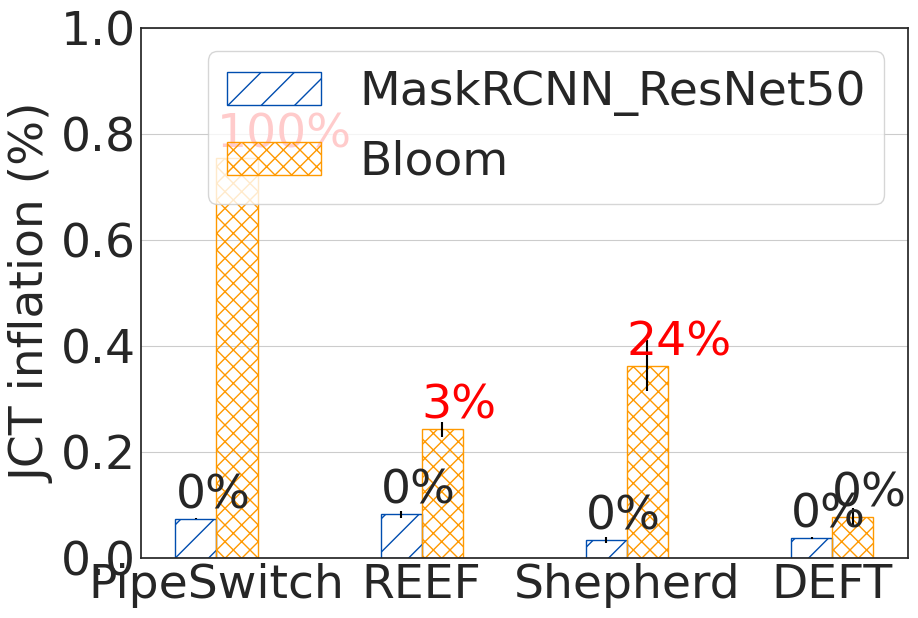

In [330]:
fig, ax = plt.subplots( figsize=(10, 7))
matplotlib.rcParams.update({'font.size': 34})
handles, labels = ax.get_legend_handles_labels()

jobA_name = "MaskRCNN_ResNet50"
jobB_name = "Bloom"
dir = "maskrcnn_resnet50_fpn_v2_batch_1_1440p_vs_bloom_batch_1_720p"
data = []
a_jct_min = 100000
b_jct_min = 100000


best_sync = get_best_sync(2444, 0.0478)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("reef", dir, 4))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))

job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0.002):
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), bar.get_height()+ text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    # l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
    # l2 = ax.hlines(job1_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="red", label=f"{jobB_name} SLO")
# handles.extend([l1, l2, job0_bars, job1_bars])
# ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.05))
ax.legend(frameon=True)
ax.yaxis.grid(True)
ax.set_ylim(0, 1)
ax.set_ylabel("JCT inflation (%)")

plt.xticks(x, settings)
plt.tight_layout()
# plt.show()
plt.savefig("eval2_batch1_1440p_inflation.pdf", bbox_inches='tight')

best sync = 50
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
pipeswitch  | job0 | 20 out of 2086 missed ddl, ddl = 118.07138880000001
pipeswitch  | job1 | 0 out of 19 missed ddl, ddl = 84.9605264
reef  | job0 | 42 out of 2109 missed ddl, ddl = 118.07138880000001
reef  | job1 | 1 out of 41 missed ddl, ddl = 84.9605264
shepherd  | job0 | 41 out of 2262 missed ddl, ddl = 118.07138880000001
shepherd  | job1 | 1 out of 40 missed ddl, ddl = 84.9605264
deft  | job0 | 42 out of 2231 missed ddl, ddl = 118.07138880000001
deft  | job1 | 0 out of 40 missed ddl, ddl = 84.9605264
0.009587727708533078
0.01991465149359886
0.018125552608311227
0.01882563872702824


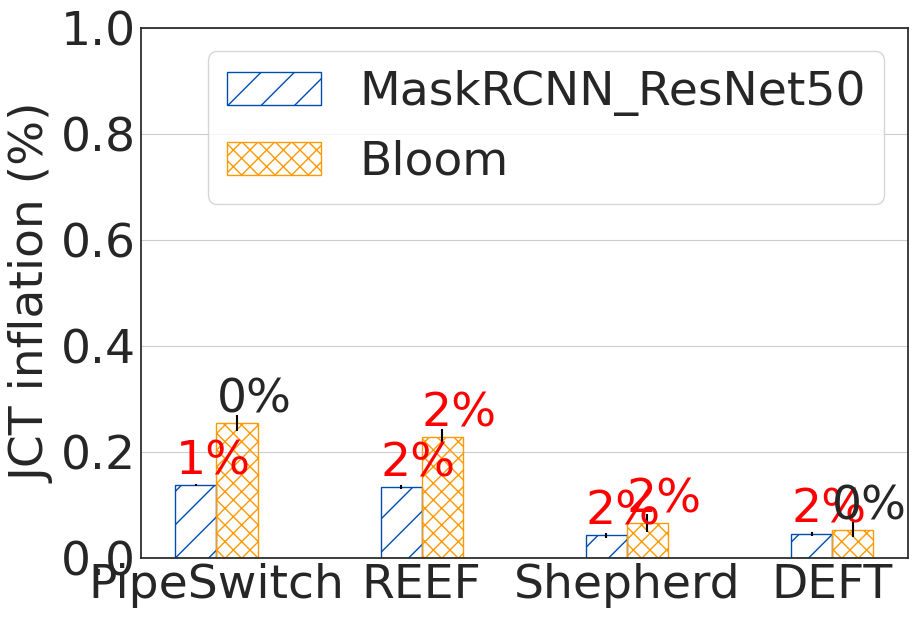

In [333]:
fig, ax = plt.subplots(figsize=(10, 7))
handles, labels = ax.get_legend_handles_labels()
matplotlib.rcParams.update({'font.size': 34})

jobA_name = "MaskRCNN_ResNet50"
jobB_name = "Bloom"
dir = "maskrcnn_resnet50_fpn_v2_batch_1_720p_vs_bloom_batch_1_720p"

data = []

a_jct_min = 100000
b_jct_min = 100000

best_sync = get_best_sync(2475, 0.0217)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("reef", dir, 4))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[3, 6]
job1_ddl = data[3, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')

for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0.002):
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), bar.get_height()+ text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    # l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), bar.get_height() + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
ax.legend(frameon=True)
ax.yaxis.grid(True)
ax.set_ylim(0, 1)
ax.set_ylabel("JCT inflation (%)")

plt.xticks(x, settings)
plt.tight_layout()
# plt.show()
plt.savefig("eval2_batch1_720p_inflation.pdf", bbox_inches='tight')

[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
best sync = 10
reef  | job0 | 0 out of 554 missed ddl, ddl = 155.0895983047228
reef  | job1 | 0 out of 69 missed ddl, ddl = 54.9895632
pipeswitch  | job0 | 10 out of 305 missed ddl, ddl = 155.0895983047228
pipeswitch  | job1 | 26 out of 26 missed ddl, ddl = 54.9895632
shepherd  | job0 | 0 out of 160 missed ddl, ddl = 155.0895983047228
shepherd  | job1 | 0 out of 30 missed ddl, ddl = 54.9895632
deft  | job0 | 0 out of 198 missed ddl, ddl = 155.0895983047228
deft  | job1 | 0 out of 32 missed ddl, ddl = 54.9895632
best sync = 20
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 68 out of 1779 missed ddl, ddl = 50.34319249012023
reef  | job1 | 1 out of 68 missed ddl, ddl = 54.239360000000005
pipeswitch  | job0 | 41 out of 531 missed ddl, ddl = 50.34319249012023
pipeswitch  | job1 | 20 out of 20 missed ddl, ddl = 54.239360000000005
shepherd  | job0 | 18 out of 505 missed ddl, ddl = 50.34319249012023
shepherd  | job1 | 0 out of 33 missed ddl, ddl 

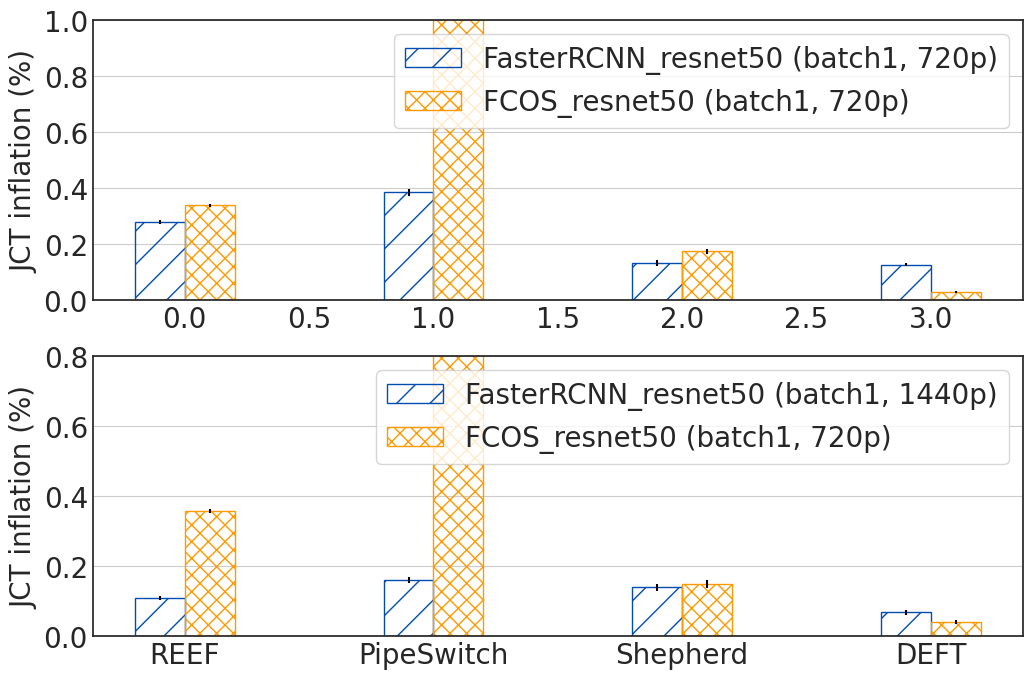

In [268]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
handles, labels = ax.get_legend_handles_labels()

jobA_name = "FasterRCNN_resnet50 (batch1, 1440p)"
jobB_name = "FCOS_resnet50 (batch1, 720p)"
data = []
a_jct_min = 100000
b_jct_min = 100000
dir = "fasterrcnn_resnet50_fpn_batch_1_1440p_vs_fcos_resnet50_fpn_batch_1_720p"

best_sync = get_best_sync(913, 0.104)

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

print(f"best sync = {best_sync}")
data.append(parse_result("reef", dir, 4))
data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax2.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax2.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
ax2.legend(frameon=True)
ax2.yaxis.grid(True)
ax2.set_ylim(0, 0.8)
ax2.set_ylabel("JCT inflation (%)")

jobA_name = "FasterRCNN_resnet50 (batch1, 720p)"
jobB_name = "FCOS_resnet50 (batch1, 720p)"
data = []
a_jct_min = 100000
b_jct_min = 100000
dir = "fasterrcnn_resnet50_fpn_batch_1_720p_vs_fcos_resnet50_fpn_batch_1_720p"

best_sync = get_best_sync(954, 0.0333)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("reef", dir, 4))
data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax1.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax1.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
ax1.legend(frameon=True)
ax1.yaxis.grid(True)
ax1.set_ylim(0, 1)
ax1.set_ylabel("JCT inflation (%)")

plt.xticks(x, settings)
plt.show()

best sync = 20
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 68 out of 1779 missed ddl, ddl = 50.34319249012023
reef  | job1 | 1 out of 68 missed ddl, ddl = 54.239360000000005
deft  | job0 | 58 out of 1676 missed ddl, ddl = 50.34319249012023
deft  | job1 | 0 out of 71 missed ddl, ddl = 54.239360000000005
deft  | job0 | 58 out of 1676 missed ddl, ddl = 50.34319249012023
deft  | job1 | 0 out of 71 missed ddl, ddl = 54.239360000000005
deft  | job0 | 58 out of 1676 missed ddl, ddl = 50.34319249012023
deft  | job1 | 0 out of 71 missed ddl, ddl = 54.239360000000005
0.03822372119168072
0.034606205250596656
0.034606205250596656
0.034606205250596656


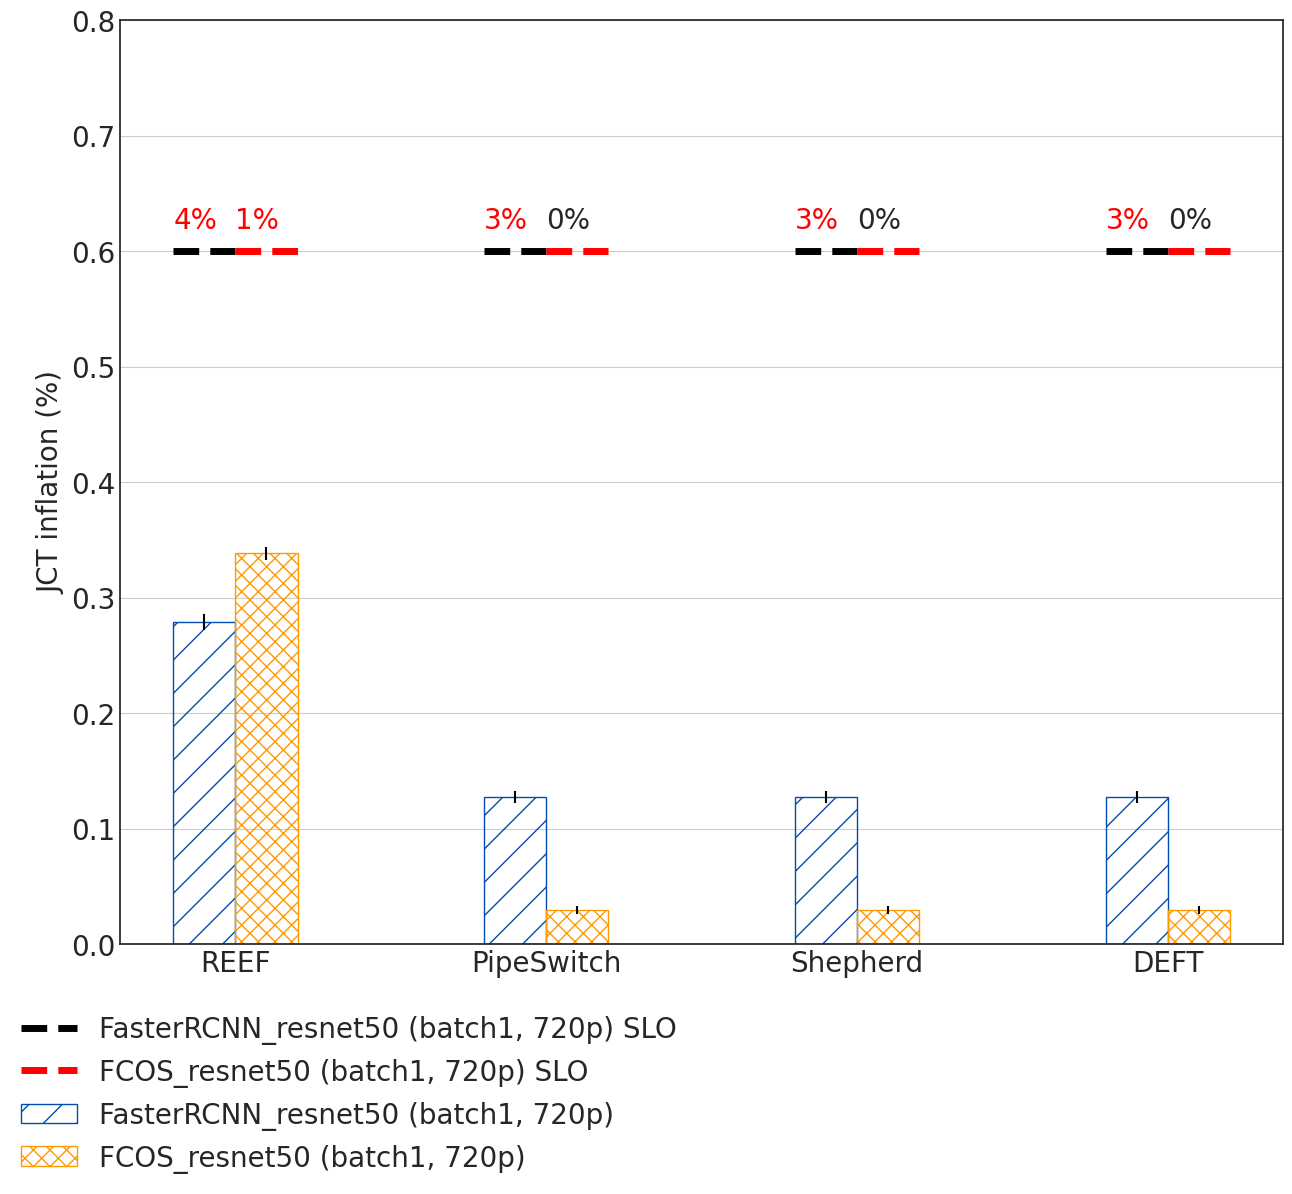

In [275]:
fig, ax = plt.subplots(figsize=(15, 12))
handles, labels = ax.get_legend_handles_labels()

jobA_name = "FasterRCNN_resnet50 (batch1, 720p)"
jobB_name = "FCOS_resnet50 (batch1, 720p)"
data = []
a_jct_min = 100000
b_jct_min = 100000
dir = "fasterrcnn_resnet50_fpn_batch_1_720p_vs_fcos_resnet50_fpn_batch_1_720p"

best_sync = get_best_sync(954, 0.0333)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
# find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
# find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("reef", dir, 4))
# data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
# data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))
data.append(parse_result("deft", dir, best_sync))
data.append(parse_result("deft", dir, best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0):
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
    l2 = ax.hlines(job1_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="red", label=f"{jobB_name} SLO")
handles.extend([l1, l2, job0_bars, job1_bars])
ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.05))
# ax.legend(bbox_to_anchor=(0.5, -0.05))
ax.yaxis.grid(True)
ax.set_ylim(0, 0.8)
ax.set_ylabel("JCT inflation (%)")
plt.xticks(x, settings)
plt.show()

best sync = 50
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 69 out of 832 missed ddl, ddl = 117.6210864
reef  | job1 | 0 out of 69 missed ddl, ddl = 55.0357728
deft  | job0 | 0 out of 755 missed ddl, ddl = 117.6210864
deft  | job1 | 0 out of 60 missed ddl, ddl = 55.0357728
deft  | job0 | 0 out of 755 missed ddl, ddl = 117.6210864
deft  | job1 | 0 out of 60 missed ddl, ddl = 55.0357728
deft  | job0 | 0 out of 755 missed ddl, ddl = 117.6210864
deft  | job1 | 0 out of 60 missed ddl, ddl = 55.0357728
0.0829326923076923
0.0
0.0
0.0


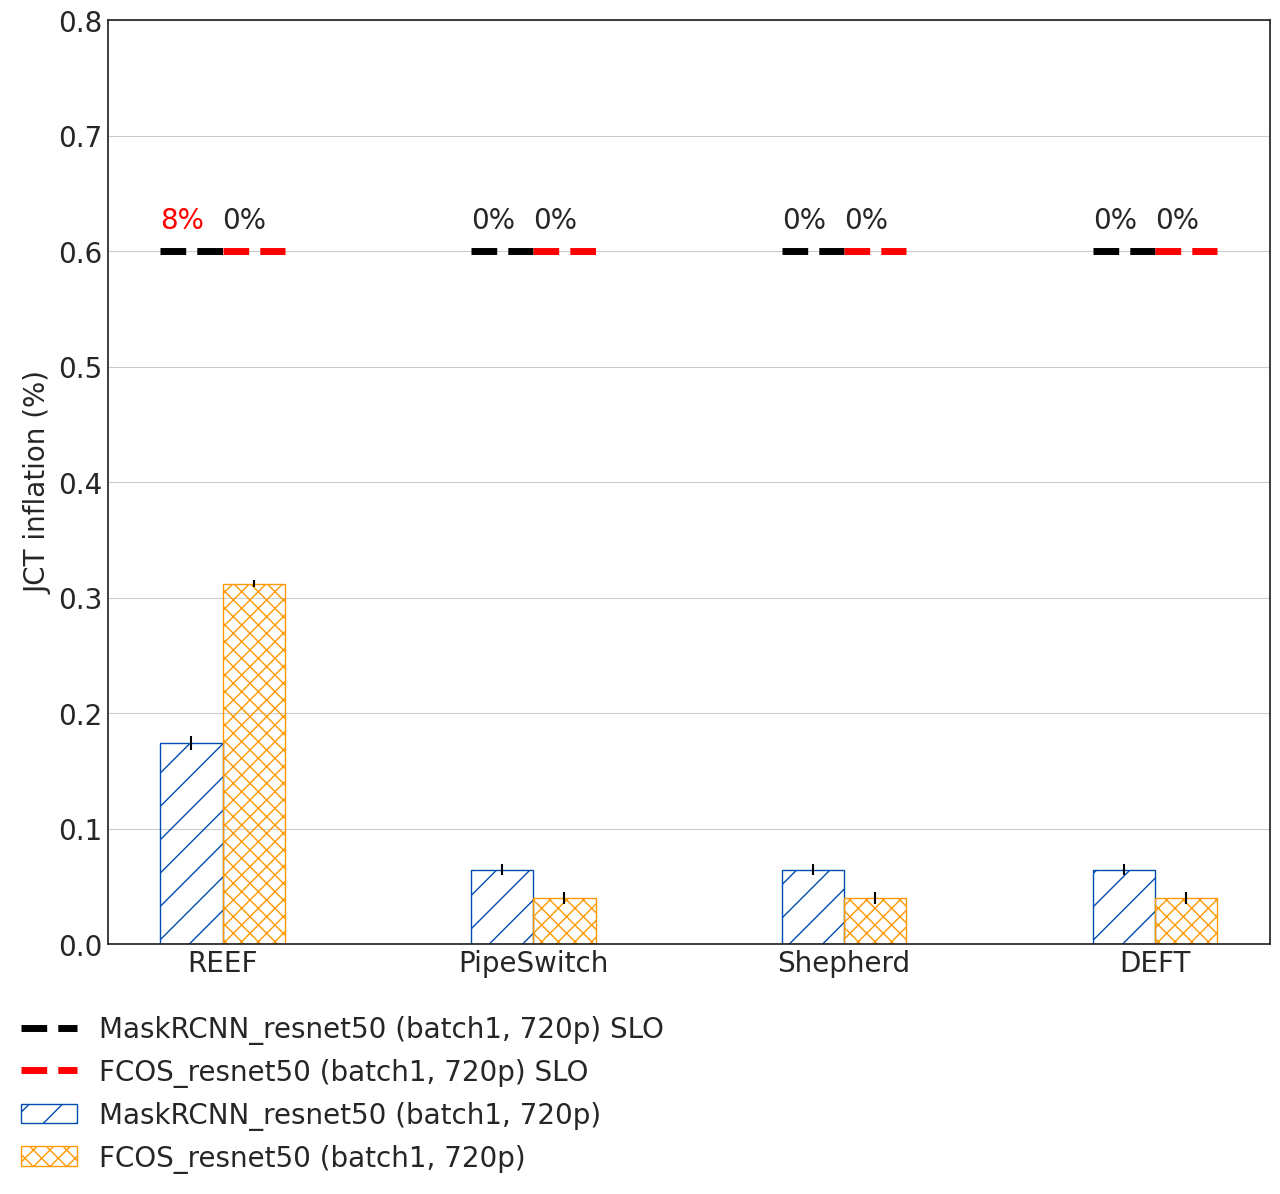

In [235]:
fig, ax = plt.subplots(figsize=(15, 12))
handles, labels = ax.get_legend_handles_labels()

jobA_name = "MaskRCNN_resnet50 (batch1, 720p)"
jobB_name = "FCOS_resnet50 (batch1, 720p)"
data = []
a_jct_min = 100000
b_jct_min = 100000
dir = "maskrcnn_resnet50_fpn_v2_batch_1_720p_vs_fcos_resnet50_fpn_batch_1_720p"

best_sync = get_best_sync(2475, 0.0217)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
# find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
# find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("reef", dir, 4))
# data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
# data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))
data.append(parse_result("deft", dir, best_sync))
data.append(parse_result("deft", dir, best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0):
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
    l2 = ax.hlines(job1_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="red", label=f"{jobB_name} SLO")
handles.extend([l1, l2, job0_bars, job1_bars])
ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.05))
# ax.legend(bbox_to_anchor=(0.5, -0.05))
ax.yaxis.grid(True)
ax.set_ylim(0, 0.8)
ax.set_ylabel("JCT inflation (%)")
plt.xticks(x, settings)
plt.show()

best sync = 20
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 0 out of 113 missed ddl, ddl = 232.08672
reef  | job1 | 0 out of 30 missed ddl, ddl = 55.4013968
deft  | job0 | 0 out of 122 missed ddl, ddl = 232.08672
deft  | job1 | 0 out of 31 missed ddl, ddl = 55.4013968
deft  | job0 | 0 out of 122 missed ddl, ddl = 232.08672
deft  | job1 | 0 out of 31 missed ddl, ddl = 55.4013968
deft  | job0 | 0 out of 122 missed ddl, ddl = 232.08672
deft  | job1 | 0 out of 31 missed ddl, ddl = 55.4013968
0.0
0.0
0.0
0.0


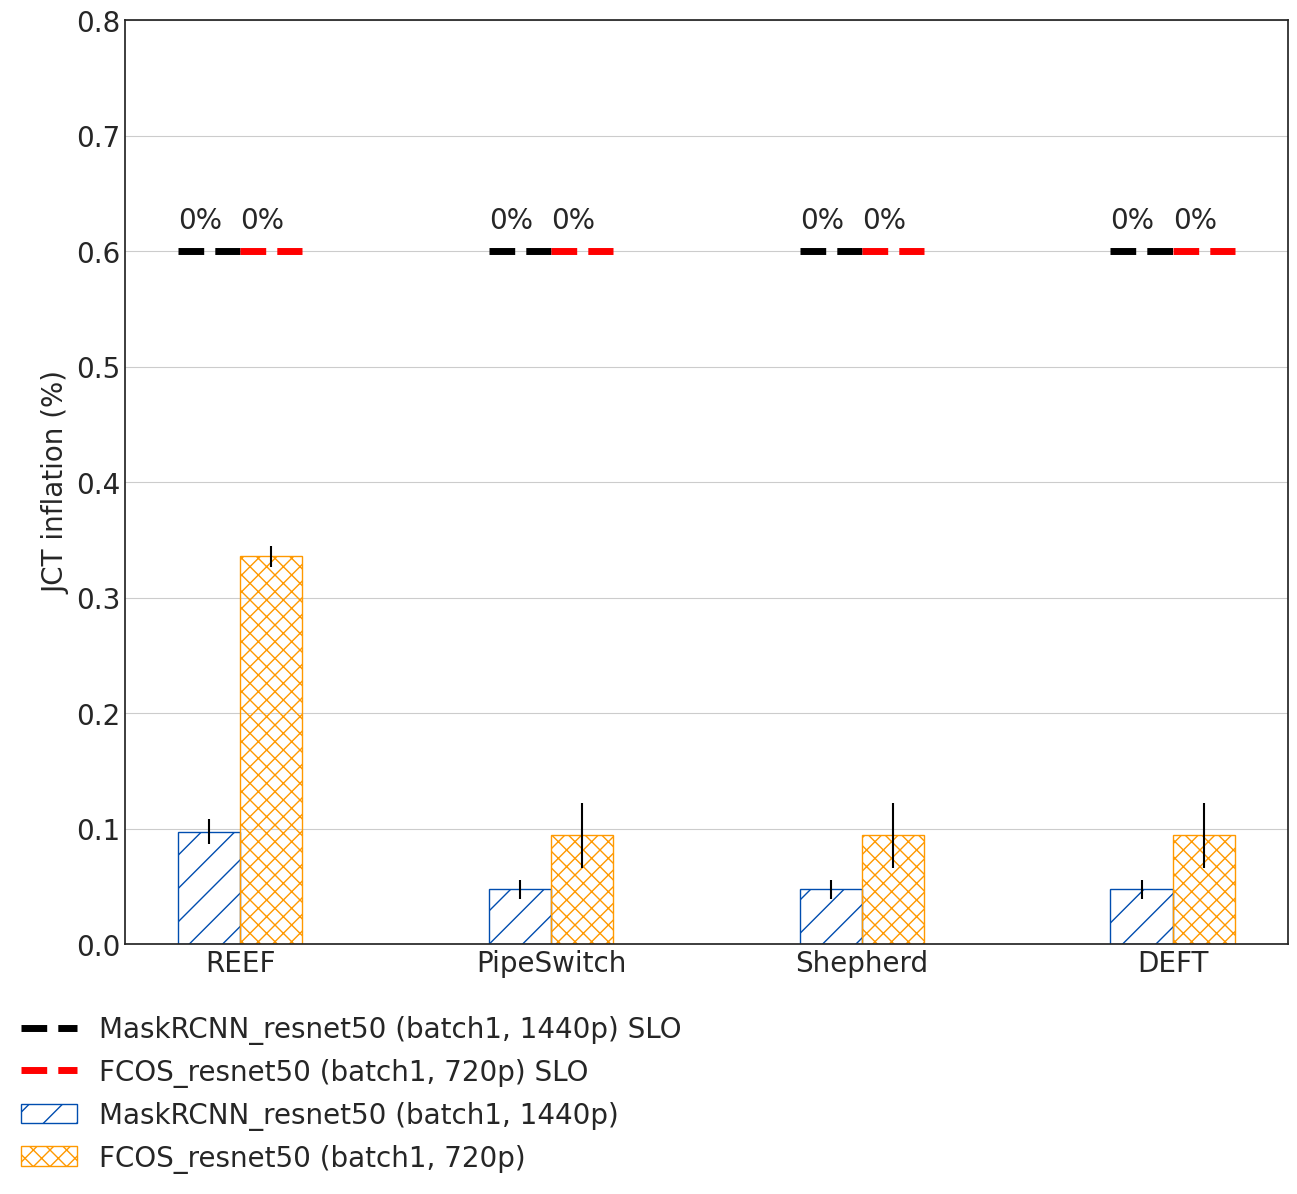

In [226]:
fig, ax = plt.subplots(figsize=(15, 12))
handles, labels = ax.get_legend_handles_labels()

jobA_name = "MaskRCNN_resnet50 (batch1, 1440p)"
jobB_name = "FCOS_resnet50 (batch1, 720p)"
data = []
a_jct_min = 100000
b_jct_min = 100000
dir = "maskrcnn_resnet50_fpn_v2_batch_1_1440p_vs_fcos_resnet50_fpn_batch_1_720p"

best_sync = get_best_sync(2444, 0.0478)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
# find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
# find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("reef", dir, 4))
# data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
# data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))
data.append(parse_result("deft", dir, best_sync))
data.append(parse_result("deft", dir, best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0):
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
    l2 = ax.hlines(job1_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="red", label=f"{jobB_name} SLO")
handles.extend([l1, l2, job0_bars, job1_bars])
ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.05))
# ax.legend(bbox_to_anchor=(0.5, -0.05))
ax.yaxis.grid(True)
ax.set_ylim(0, 0.8)
ax.set_ylabel("JCT inflation (%)")
plt.xticks(x, settings)
plt.show()

best sync = 10
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 0 out of 160 missed ddl, ddl = 182.72008000000002
reef  | job1 | 0 out of 32 missed ddl, ddl = 55.006356800000006
deft  | job0 | 0 out of 162 missed ddl, ddl = 182.72008000000002
deft  | job1 | 0 out of 31 missed ddl, ddl = 55.006356800000006
deft  | job0 | 0 out of 162 missed ddl, ddl = 182.72008000000002
deft  | job1 | 0 out of 31 missed ddl, ddl = 55.006356800000006
deft  | job0 | 0 out of 162 missed ddl, ddl = 182.72008000000002
deft  | job1 | 0 out of 31 missed ddl, ddl = 55.006356800000006
0.0
0.0
0.0
0.0


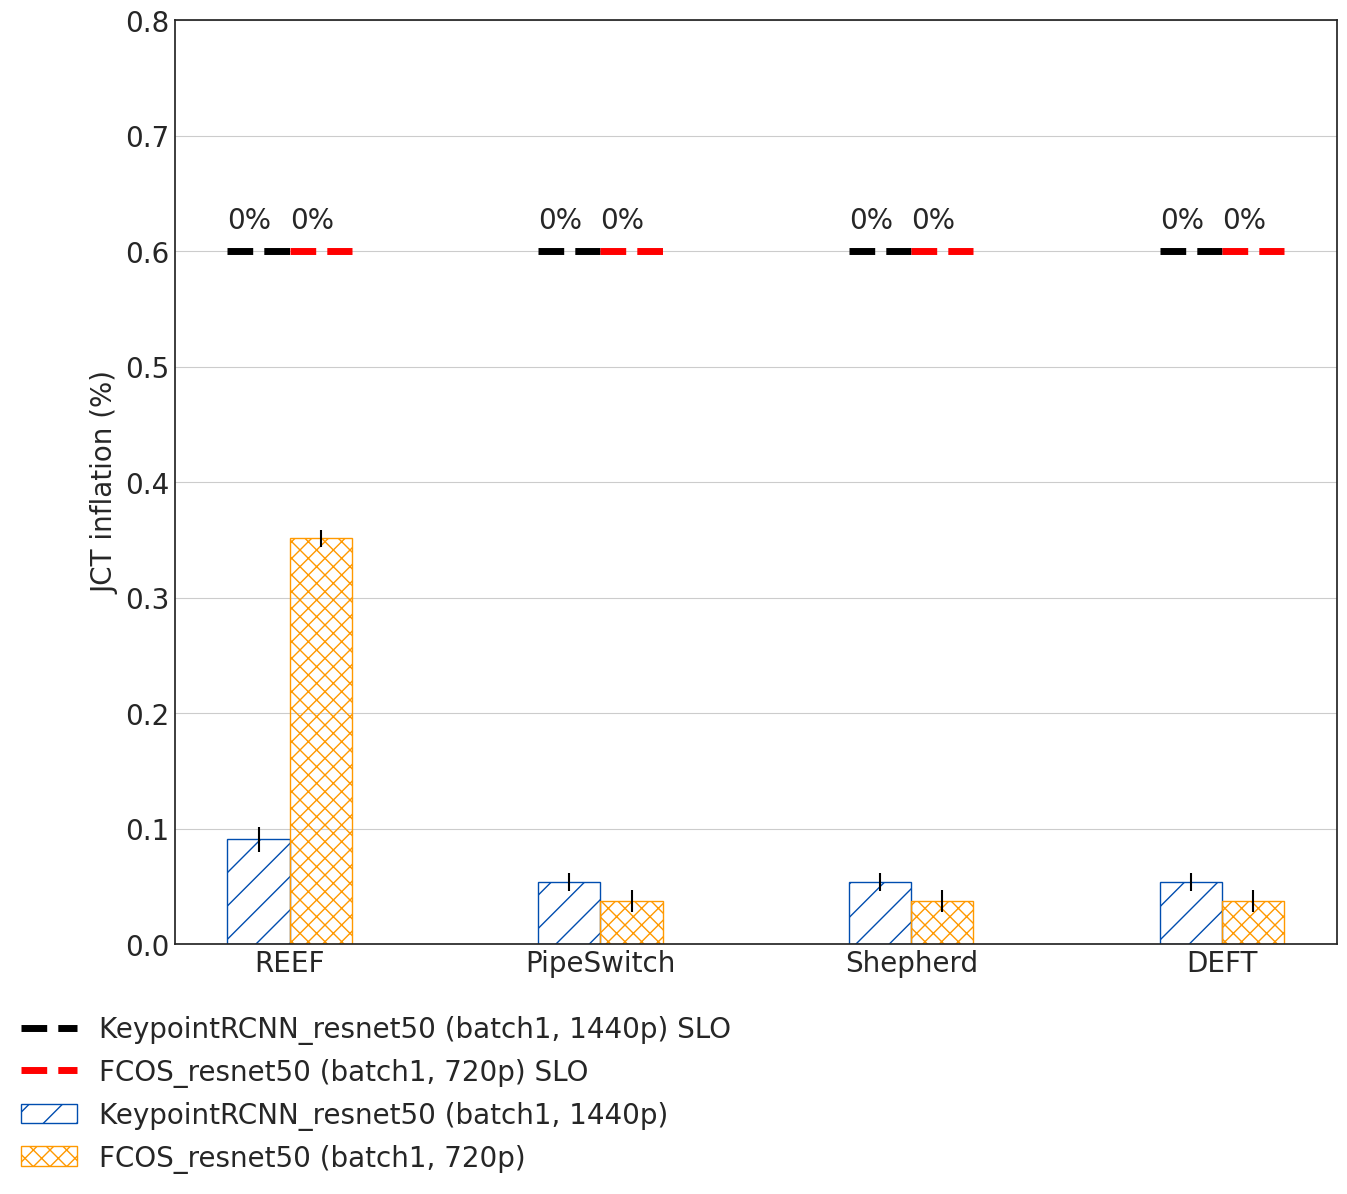

In [227]:
fig, ax = plt.subplots(figsize=(15, 12))
handles, labels = ax.get_legend_handles_labels()

jobA_name = "KeypointRCNN_resnet50 (batch1, 1440p)"
jobB_name = "FCOS_resnet50 (batch1, 720p)"
data = []
a_jct_min = 100000
b_jct_min = 100000
dir = "keypointrcnn_resnet50_fpn_batch_1_1440p_vs_fcos_resnet50_fpn_batch_1_720p"

best_sync = get_best_sync(1239, 0.0795)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("reef", dir, 4))
data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0):
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
    l2 = ax.hlines(job1_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="red", label=f"{jobB_name} SLO")
handles.extend([l1, l2, job0_bars, job1_bars])
ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.05))
# ax.legend(bbox_to_anchor=(0.5, -0.05))
ax.yaxis.grid(True)
ax.set_ylim(0, 0.8)
ax.set_ylabel("JCT inflation (%)")
plt.xticks(x, settings)
plt.show()

best sync = 2
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 0 out of 696 missed ddl, ddl = 286.3059152
reef  | job1 | 3 out of 125 missed ddl, ddl = 55.4984704
pipeswitch  | job0 | 0 out of 167 missed ddl, ddl = 286.3059152
pipeswitch  | job1 | 23 out of 23 missed ddl, ddl = 55.4984704
shepherd  | job0 | 0 out of 181 missed ddl, ddl = 286.3059152
shepherd  | job1 | 1 out of 33 missed ddl, ddl = 55.4984704
deft  | job0 | 0 out of 160 missed ddl, ddl = 286.3059152
deft  | job1 | 0 out of 31 missed ddl, ddl = 55.4984704
best sync = 4
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 125 out of 2567 missed ddl, ddl = 76.78059040000001
reef  | job1 | 0 out of 125 missed ddl, ddl = 54.4491984
pipeswitch  | job0 | 47 out of 586 missed ddl, ddl = 76.78059040000001
pipeswitch  | job1 | 28 out of 28 missed ddl, ddl = 54.4491984
shepherd  | job0 | 32 out of 660 missed ddl, ddl = 76.78059040000001
shepherd  | job1 | 1 out of 32 missed ddl, ddl = 54.4491984
deft  | job0 | 30 out of 63

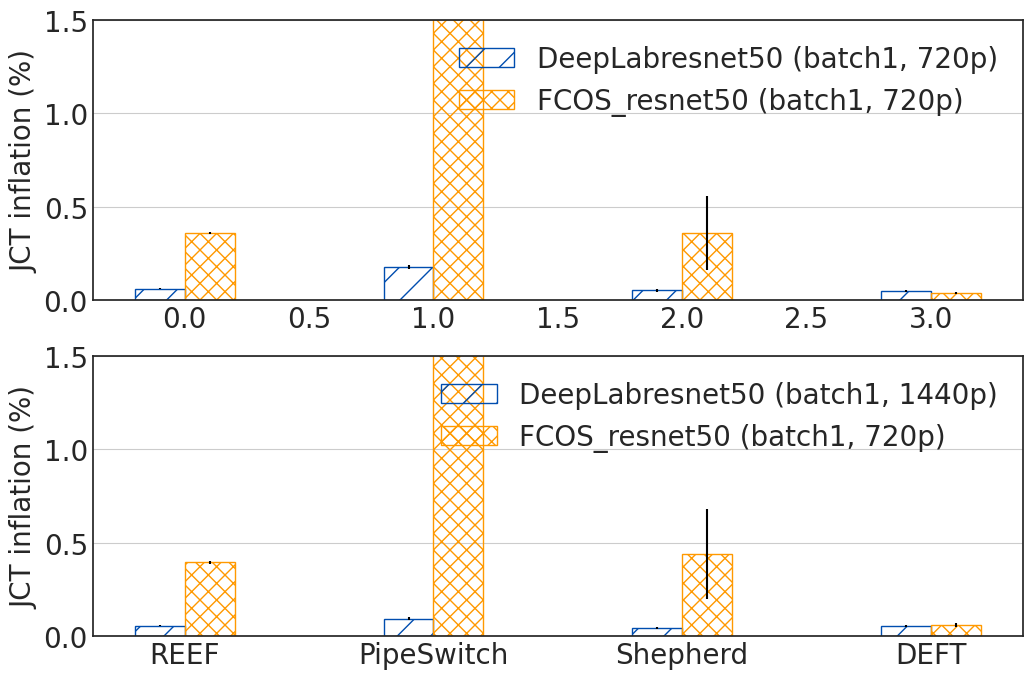

In [274]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
handles, labels = ax.get_legend_handles_labels()

jobA_name = "DeepLabresnet50 (batch1, 1440p)"
jobB_name = "FCOS_resnet50 (batch1, 720p)"
data = []
a_jct_min = 100000
b_jct_min = 100000
dir = "deeplabv3_resnet50_batch_1_1440p_vs_fcos_resnet50_fpn_batch_1_720p"

best_sync = get_best_sync(246, 0.727)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("reef", dir, 4))
data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax2.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax2.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
# for i, bar in enumerate(job0_bars):
#     yval = bar.get_height()
#     print(job0_rate[i])
#     if (job0_rate[i] > 0):
#         plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
#     else:
#         plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
#     l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
# for i, bar in enumerate(job1_bars):
#     yval = bar.get_height()
#     if (job1_rate[i] > 0):
#         plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
#     else:
#         plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
#     l2 = ax.hlines(job1_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="red", label=f"{jobB_name} SLO")
# handles.extend([l1, l2, job0_bars, job1_bars])
# ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.05))
# ax.legend(bbox_to_anchor=(0.5, -0.05))
ax2.legend()
ax2.yaxis.grid(True)
ax2.set_ylim(0, 1.5)
ax2.set_ylabel("JCT inflation (%)")


jobA_name = "DeepLabresnet50 (batch1, 720p)"
jobB_name = "FCOS_resnet50 (batch1, 720p)"
data = []
a_jct_min = 100000
b_jct_min = 100000
dir = "deeplabv3_resnet50_batch_1_720p_vs_fcos_resnet50_fpn_batch_1_720p"

best_sync = get_best_sync(247, 0.189)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("reef", dir, 4))
data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax1.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax1.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
ax1.legend()
ax1.yaxis.grid(True)
ax1.set_ylim(0, 1.5)
ax1.set_ylabel("JCT inflation (%)")
plt.xticks(x, settings)
plt.show()

best sync = 4
[0 1 2 3]
[0 1 2 3]
reef  | job0 | 125 out of 2567 missed ddl, ddl = 77.09548960000001
reef  | job1 | 0 out of 125 missed ddl, ddl = 54.4491984
deft  | job0 | 30 out of 634 missed ddl, ddl = 77.09548960000001
deft  | job1 | 0 out of 30 missed ddl, ddl = 54.4491984
deft  | job0 | 30 out of 634 missed ddl, ddl = 77.09548960000001
deft  | job1 | 0 out of 30 missed ddl, ddl = 54.4491984
deft  | job0 | 30 out of 634 missed ddl, ddl = 77.09548960000001
deft  | job1 | 0 out of 30 missed ddl, ddl = 54.4491984
0.04869497467861317
0.0473186119873817
0.0473186119873817
0.0473186119873817


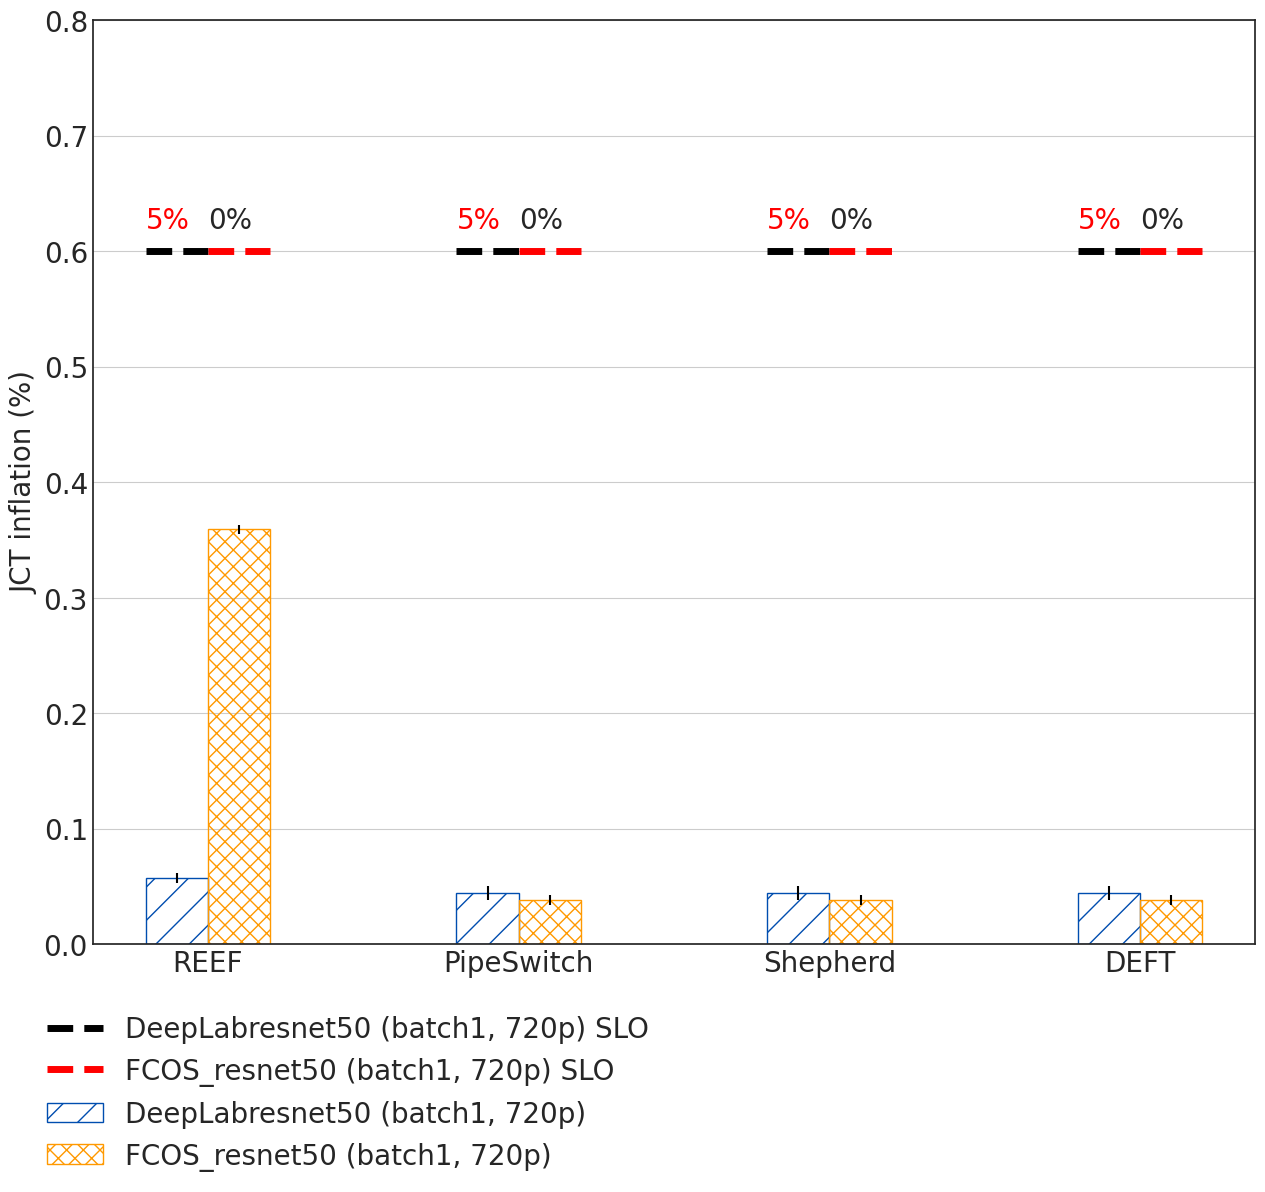

In [234]:
fig, ax = plt.subplots(figsize=(15, 12))
handles, labels = ax.get_legend_handles_labels()

jobA_name = "DeepLabresnet50 (batch1, 720p)"
jobB_name = "FCOS_resnet50 (batch1, 720p)"
data = []
a_jct_min = 100000
b_jct_min = 100000
dir = "deeplabv3_resnet50_batch_1_720p_vs_fcos_resnet50_fpn_batch_1_720p"

best_sync = get_best_sync(247, 0.189)
print(f"best sync = {best_sync}")

find_min_jct("reef", dir, 4)
# find_min_jct("pipeswitch", f"{dir}_layer_sync", 20)
# find_min_jct("shepherd", f"{dir}_kernel_sync", 20)
find_min_jct("deft", dir, best_sync)

data.append(parse_result("reef", dir, 4))
# data.append(parse_result("pipeswitch", f"{dir}_layer_sync", 20))
# data.append(parse_result("shepherd", f"{dir}_kernel_sync", 20))
data.append(parse_result("deft", dir, best_sync))
data.append(parse_result("deft", dir, best_sync))
data.append(parse_result("deft", dir, best_sync))
# print(data)
# print(pipeswitch_jobA_mean, pipeswitch_jobB_mean, pipeswitch_jobA_std, pipeswitch_jobB_std, pipeswitch_jobA_rate, pipeswitch_jobB_rate)
# print(reef_jobA_mean, reef_jobB_mean, reef_jobA_std, reef_jobB_std, reef_jobA_rate, reef_jobB_rate)

data = np.array(data)
job0_jct = data[:, 0]
job1_jct = data[:, 1]
job0_err = data[:, 2]
job1_err = data[:, 3]
job0_rate = data[:, 4]
job1_rate = data[:, 5]
job0_ddl = data[0, 6]
job1_ddl = data[0, 7]
job0_ddl = 0.6
job1_ddl = 0.6

text_hight_over_ddl = 0.02 #2
x = np.arange(len(settings))
job0_bars = ax.bar(x - 0.1, job0_jct, 0.2, yerr=job0_err, label=jobA_name, edgecolor=colors[0], fill=False, hatch='/')
job1_bars = ax.bar(x + 0.1, job1_jct, 0.2, yerr=job1_err, label=jobB_name, edgecolor=colors[1], fill=False, hatch='xx')
for i, bar in enumerate(job0_bars):
    yval = bar.get_height()
    print(job0_rate[i])
    if (job0_rate[i] > 0):
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job0_ddl + text_hight_over_ddl, "{0:.00%}".format(job0_rate[i]))
    l1 = ax.hlines(job0_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="black", label=f"{jobA_name} SLO")
for i, bar in enumerate(job1_bars):
    yval = bar.get_height()
    if (job1_rate[i] > 0):
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]), color="red")
    else:
        plt.text(bar.get_x(), job1_ddl + text_hight_over_ddl, "{0:.00%}".format(job1_rate[i]))
    l2 = ax.hlines(job1_ddl, xmin=bar.get_x(), xmax=bar.get_x()+0.2, linewidth=5, linestyle="--", color="red", label=f"{jobB_name} SLO")
handles.extend([l1, l2, job0_bars, job1_bars])
ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.05))
# ax.legend(bbox_to_anchor=(0.5, -0.05))
ax.yaxis.grid(True)
ax.set_ylim(0, 0.8)
ax.set_ylabel("JCT inflation (%)")
plt.xticks(x, settings)
plt.show()